In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [576]:
# Importing the dataset

In [577]:
df_space = pd.read_csv("/Users/thavaseelan/Downloads/space_missions.csv")

In [578]:
df_space

Company  Temperature_f  Wind_Speed_mph  Humidity pct Vehicle Type  \
0    space_x           86.0             9.0          74.0       falcon   
1    space_x            NaN             NaN           NaN       falcon   
2    space_x            NaN             NaN           NaN       falcon   
3    space_x            NaN             NaN           NaN       falcon   
4    space_x            NaN             NaN           NaN       falcon   
..       ...            ...             ...           ...          ...   
145   boeing           51.0             0.0          66.0        delta   
146   boeing           59.0             8.0          67.0        delta   
147   boeing           76.0             3.0          87.0        delta   
148   boeing           72.0             5.0          73.0        delta   
149   boeing           50.0             0.0         100.0        delta   

     Liftoff Thrust_kn  Payload To Orbit kg  Rocket Height_m  \
0                  343                  470            22.25   
1                  343                  470            22.25   
2                  343                  470            22.25   
3                  343                  470            22.25   
4                  343                  470            22.25   
..                 ...                  ...              ...   
145               3511                 4800            38.90   
146               3511                 4800            38.90   
147               3020                 1110            38.10   
148               4895                 6390            62.50   
149               2533                 2703            38.90   

     Fairing_Diameter_m  Payload_Mass_kg                 Payload_Orbit  \
0                   1.5             19.5               low_earth_orbit   
1                   1.5              NaN               low_earth_orbit   
2                   1.5              NaN               low_earth_orbit   
3                   1.5              8.0               low_earth_orbit   
4                   1.5              NaN               low_earth_orbit   
..                  ...              ...                           ...   
145                 3.0            689.0               low_earth_orbit   
146                 3.0           3117.0               low_earth_orbit   
147                 2.9            328.0            heliocentric_orbit   
148                 4.0           3170.0  geostationary_transfer_orbit   
149                 3.0            970.0         sun_synchronous_orbit   

    Mission_Status  
0          failure  
1          failure  
2          failure  
3          failure  
4          failure  
..             ...  
145        success  
146        success  
147        success  
148        success  
149        success  

[150 rows x 12 columns]

In [579]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              150 non-null    object 
 1   Temperature_f        136 non-null    float64
 2   Wind_Speed_mph       136 non-null    float64
 3   Humidity pct         136 non-null    float64
 4   Vehicle Type         150 non-null    object 
 5   Liftoff Thrust_kn    150 non-null    int64  
 6   Payload To Orbit kg  150 non-null    int64  
 7   Rocket Height_m      150 non-null    float64
 8   Fairing_Diameter_m   146 non-null    float64
 9   Payload_Mass_kg      131 non-null    float64
 10  Payload_Orbit        150 non-null    object 
 11  Mission_Status       150 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 14.2+ KB


In [580]:
df_space.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              150 non-null    object 
 1   Temperature_f        136 non-null    float64
 2   Wind_Speed_mph       136 non-null    float64
 3   Humidity pct         136 non-null    float64
 4   Vehicle Type         150 non-null    object 
 5   Liftoff Thrust_kn    150 non-null    int64  
 6   Payload To Orbit kg  150 non-null    int64  
 7   Rocket Height_m      150 non-null    float64
 8   Fairing_Diameter_m   146 non-null    float64
 9   Payload_Mass_kg      131 non-null    float64
 10  Payload_Orbit        150 non-null    object 
 11  Mission_Status       150 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 14.2+ KB


In [581]:
# Renaming and updating columns
df_space.columns

Index(['Company', 'Temperature_f', 'Wind_Speed_mph', 'Humidity pct',
       'Vehicle Type', 'Liftoff Thrust_kn', 'Payload To Orbit kg',
       'Rocket Height_m', 'Fairing_Diameter_m', 'Payload_Mass_kg',
       'Payload_Orbit', 'Mission_Status'],
      dtype='object')

In [582]:
#Converting all the fields to lower case
df_space = df_space.rename(mapper=str.lower,axis=1)

In [583]:
df_space.columns

Index(['company', 'temperature_f', 'wind_speed_mph', 'humidity pct',
       'vehicle type', 'liftoff thrust_kn', 'payload to orbit kg',
       'rocket height_m', 'fairing_diameter_m', 'payload_mass_kg',
       'payload_orbit', 'mission_status'],
      dtype='object')

In [584]:
#Renaming the columns
df_space = df_space.rename(columns={'temperature_f':'temperature f','wind_speed_mph':'wind speed mph','liftoff thrust_kn':'liftoff thrust kn','rocket height_m':'rocket height m','fairing_diameter_m':'fairing diameter m','payload_mass_kg':'payload mass kg', 'payload_orbit':'payload orbit','mission_status':'mission status'})

In [585]:
df_space.columns

Index(['company', 'temperature f', 'wind speed mph', 'humidity pct',
       'vehicle type', 'liftoff thrust kn', 'payload to orbit kg',
       'rocket height m', 'fairing diameter m', 'payload mass kg',
       'payload orbit', 'mission status'],
      dtype='object')

In [586]:
df_space.sort_values('mission status').groupby(by='company').first()

temperature f  wind speed mph  humidity pct  \
company                                                               
arianespace                      77.0             0.0          94.0   
boeing                           84.0            10.0          60.0   
brazilian_space_agency           83.0            10.0          85.0   
european_space_agency             NaN             NaN           NaN   
martin_marietta                  62.0            12.0          89.0   
space_x                          86.0             9.0          74.0   
us_air_force                     56.0            12.0          75.0   

                       vehicle type  liftoff thrust kn  payload to orbit kg  \
company                                                                       
arianespace                  ariane               4334                 2930   
boeing                        delta               3511                 1819   
brazilian_space_agency          vls                623                  380   
european_space_agency        ariane               2772                 1850   
martin_marietta               titan               1900                 3600   
space_x                      falcon                343                  470   
us_air_force                  titan               1936                 3100   

                        rocket height m  fairing diameter m  payload mass kg  \
company                                                                        
arianespace                       58.72                 5.4           2920.0   
boeing                            38.10                 2.9            711.0   
brazilian_space_agency            19.00                 1.0             74.0   
european_space_agency             50.00                 NaN           1710.0   
martin_marietta                   42.90                 3.0           2750.0   
space_x                           22.25                 1.5             19.5   
us_air_force                      42.00                 3.0              0.0   

                                       payload orbit mission status  
company                                                              
arianespace             geostationary_transfer_orbit        failure  
boeing                  geostationary_transfer_orbit        failure  
brazilian_space_agency               low_earth_orbit        failure  
european_space_agency   geostationary_transfer_orbit        failure  
martin_marietta                sun_synchronous_orbit        failure  
space_x                              low_earth_orbit        failure  
us_air_force                         low_earth_orbit        failure

In [587]:
df_space.sort_values('mission status').groupby(by='company').last()

temperature f  wind speed mph  humidity pct  \
company                                                               
arianespace                      73.0             0.0          94.0   
boeing                           50.0             0.0         100.0   
brazilian_space_agency           84.0            12.0          84.0   
european_space_agency             NaN             NaN           NaN   
martin_marietta                  62.0            12.0          89.0   
space_x                          55.0             8.0          83.0   
us_air_force                     90.0            12.0          70.0   

                       vehicle type  liftoff thrust kn  payload to orbit kg  \
company                                                                       
arianespace                  ariane              11400                 6900   
boeing                        delta               2533                 2703   
brazilian_space_agency          vls                623                  380   
european_space_agency        ariane               2772                 1850   
martin_marietta               titan               1900                 3600   
space_x                      falcon               6804                22800   
us_air_force                  titan              13642                13100   

                        rocket height m  fairing diameter m  payload mass kg  \
company                                                                        
arianespace                        52.0                 2.6           1197.0   
boeing                             38.9                 3.0            970.0   
brazilian_space_agency             19.0                 1.0            115.0   
european_space_agency              50.0                 NaN           1710.0   
martin_marietta                    42.9                 3.0           2750.0   
space_x                            70.0                 5.2           5960.0   
us_air_force                       42.0                 3.0           3000.0   

                                       payload orbit mission status  
company                                                              
arianespace                         high_earth_orbit        failure  
boeing                         sun_synchronous_orbit        success  
brazilian_space_agency               low_earth_orbit        failure  
european_space_agency   geostationary_transfer_orbit        failure  
martin_marietta                sun_synchronous_orbit        failure  
space_x                                  polar_orbit        success  
us_air_force                         low_earth_orbit        failure

In [588]:
df_space.groupby('mission status').size()

mission status
failure     30
success    120
dtype: int64

In [589]:
df_space.groupby('company').size()

company
arianespace                4
boeing                    37
brazilian_space_agency     3
european_space_agency      2
martin_marietta            1
space_x                   96
us_air_force               7
dtype: int64

In [590]:
df_space.groupby('payload orbit').size()

payload orbit
earth_moon_l2_orbit              1
geostationary_transfer_orbit    45
heliocentric_orbit               6
high_earth_orbit                 2
low_earth_orbit                 63
mars_orbit                       1
medium_earth_orbit               9
polar_orbit                     12
suborbital                       1
sun_earth_orbit                  1
sun_synchronous_orbit            9
dtype: int64

In [591]:
df_space['company'].value_counts(sort=False)

company
space_x                   96
boeing                    37
martin_marietta            1
us_air_force               7
european_space_agency      2
brazilian_space_agency     3
arianespace                4
Name: count, dtype: int64

In [592]:
df_space.isnull()

company  temperature f  wind speed mph  humidity pct  vehicle type  \
0      False          False           False         False         False   
1      False           True            True          True         False   
2      False           True            True          True         False   
3      False           True            True          True         False   
4      False           True            True          True         False   
..       ...            ...             ...           ...           ...   
145    False          False           False         False         False   
146    False          False           False         False         False   
147    False          False           False         False         False   
148    False          False           False         False         False   
149    False          False           False         False         False   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
0                False                False            False   
1                False                False            False   
2                False                False            False   
3                False                False            False   
4                False                False            False   
..                 ...                  ...              ...   
145              False                False            False   
146              False                False            False   
147              False                False            False   
148              False                False            False   
149              False                False            False   

     fairing diameter m  payload mass kg  payload orbit  mission status  
0                 False            False          False           False  
1                 False             True          False           False  
2                 False             True          False           False  
3                 False            False          False           False  
4                 False             True          False           False  
..                  ...              ...            ...             ...  
145               False            False          False           False  
146               False            False          False           False  
147               False            False          False           False  
148               False            False          False           False  
149               False            False          False           False  

[150 rows x 12 columns]

In [593]:
df_space.isnull().sum()

company                 0
temperature f          14
wind speed mph         14
humidity pct           14
vehicle type            0
liftoff thrust kn       0
payload to orbit kg     0
rocket height m         0
fairing diameter m      4
payload mass kg        19
payload orbit           0
mission status          0
dtype: int64

In [594]:
df_space.describe().T

count          mean          std    min      25%     50%  \
temperature f        136.0     70.441176    12.700986   37.0    60.75    73.0   
wind speed mph       136.0      8.007353     4.968786    0.0     5.00     8.0   
humidity pct         136.0     76.066176    15.708079   37.0    65.00    78.0   
liftoff thrust kn    150.0   5668.360000  3619.496024  343.0  3511.00  5885.0   
payload to orbit kg  150.0  10708.913333  9502.621246  380.0  3099.00  8300.0   
rocket height m      150.0     56.337133    16.577740   19.0    38.90    68.4   
fairing diameter m   146.0      4.252329     1.308869    1.0     3.00     5.2   
payload mass kg      131.0   3495.767176  3391.562385    0.0   734.50  2700.0   

                         75%      max  
temperature f           80.0     93.0  
wind speed mph          12.0     23.0  
humidity pct            89.0    100.0  
liftoff thrust kn     6804.0  22819.0  
payload to orbit kg  22800.0  63800.0  
rocket height m         70.0     72.0  
fairing diameter m       5.2      5.4  
payload mass kg       4701.5  15600.0

<Axes: >

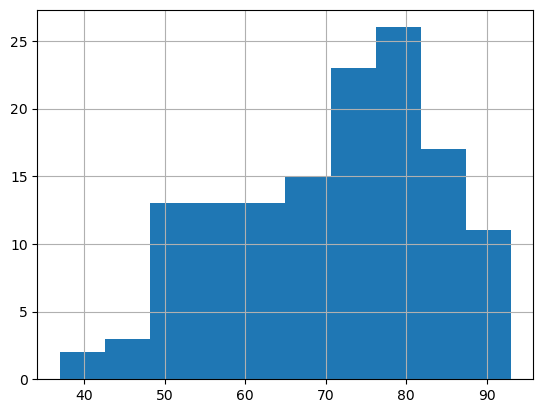

In [595]:
df_space['temperature f'].hist()

In [596]:
pd.cut(df_space['temperature f'],bins=10).value_counts()

temperature f
(76.2, 81.8]      26
(70.6, 76.2]      23
(81.8, 87.4]      17
(59.4, 65.0]      15
(48.2, 53.8]      13
(53.8, 59.4]      13
(65.0, 70.6]      13
(87.4, 93.0]      11
(42.6, 48.2]       3
(36.944, 42.6]     2
Name: count, dtype: int64

In [597]:
# Checking Outliers using box-plots

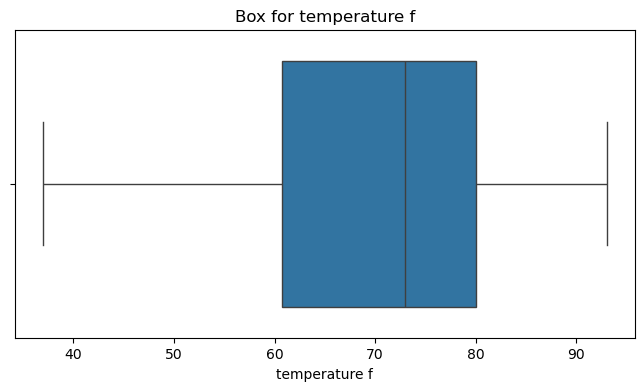

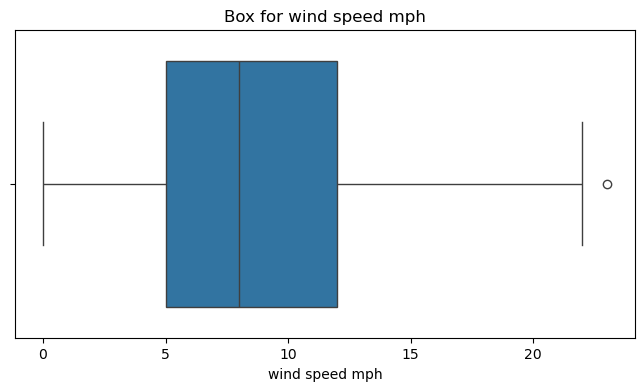

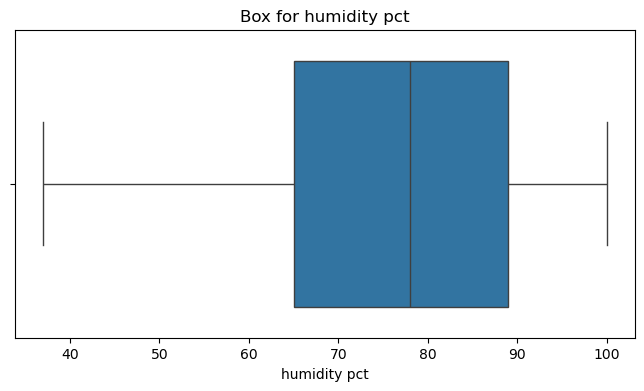

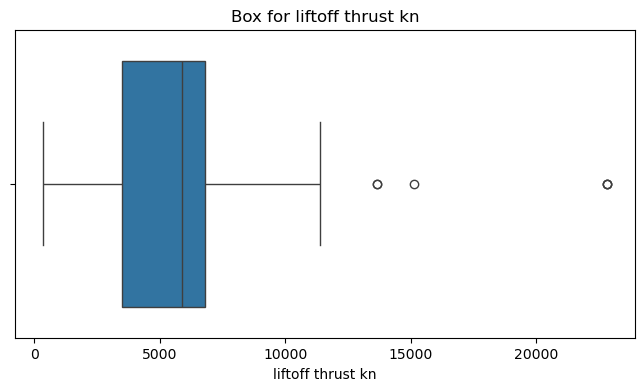

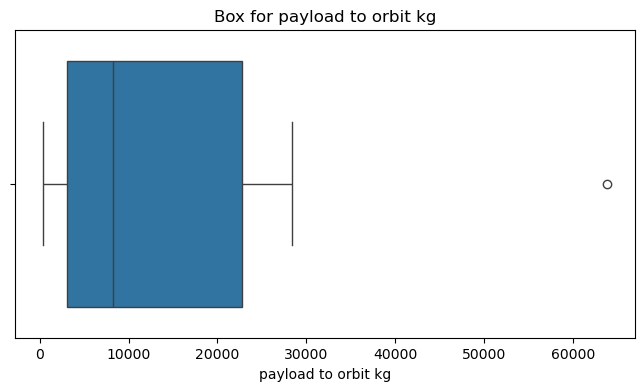

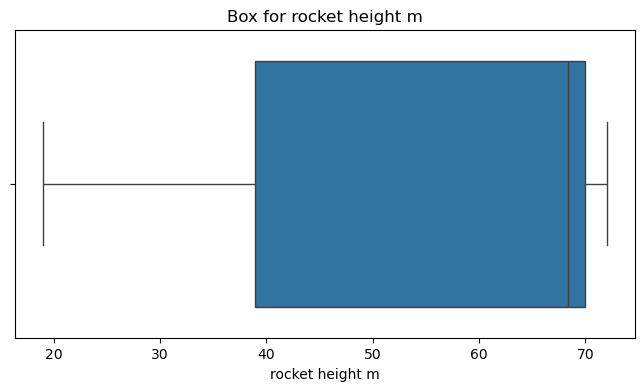

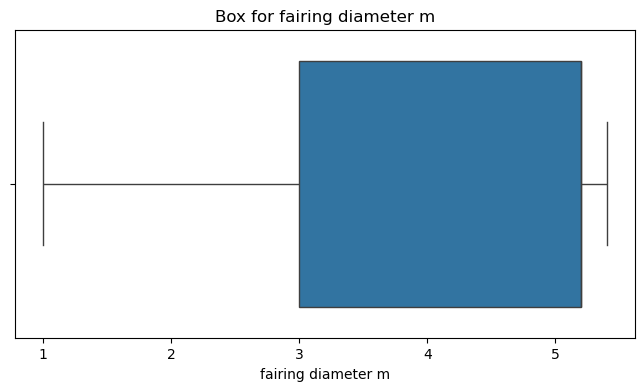

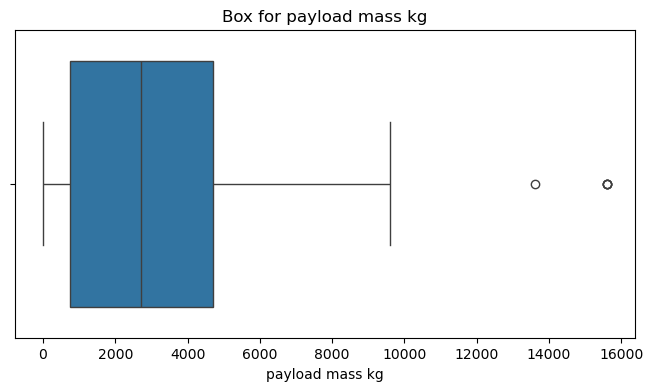

In [598]:
def check_outliers(df, column_name):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = df_space[column_name])
    plt.title(f"Box for {column_name}")
    plt.show()
column_of_interest = ["temperature f", "wind speed mph", "humidity pct", "liftoff thrust kn", "payload to orbit kg", "rocket height m", "fairing diameter m", "payload mass kg"]
for col in column_of_interest:
    check_outliers(df_space, col)

In case of boxplot on windspeed_mph, there is outlier close to 23. In case of boxplot on liftoff_thrust_kn, there are 30% outliers after 10000. In case of boxplot on payload_mass_kg, there is two outliers after 120000. In case of payload_to_orbit_kg, there is outlier after 60000.

Quantile-Quantile plot

Qunatile is something that splits the dataset into equal number of parts, When this happens Each Quantile can be similar to the another quantile in the entire dataset
Q-Q plot is often used for determining if a speci c dataset follows a particular probability distribution or not, mostly it is used for checking is a dataset is following a normal distribution

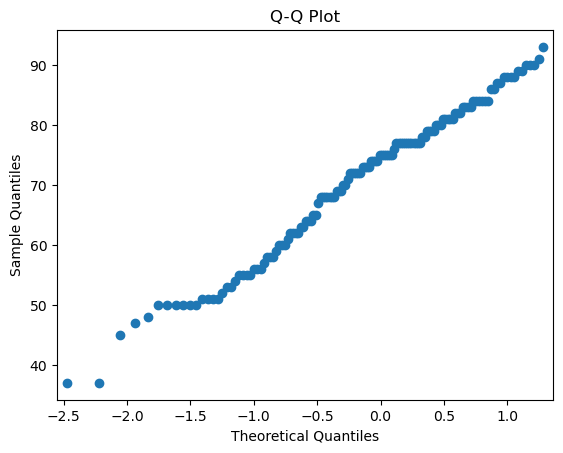

In [599]:
import statsmodels.api as sm
def check_normal(df_space, column_name):
    sm.qqplot(df_space[column_name])
    plt.title("Q-Q Plot")
    plt.show()
check_normal(df_space, "temperature f")

Univariate analysis

Univariate analysis involves the analysis of a single variable. It is often de nes as analyzing and understanding the distribution, central tendency of a single variable from the dataset. It focuses on analysing the variables in isolation one by one.

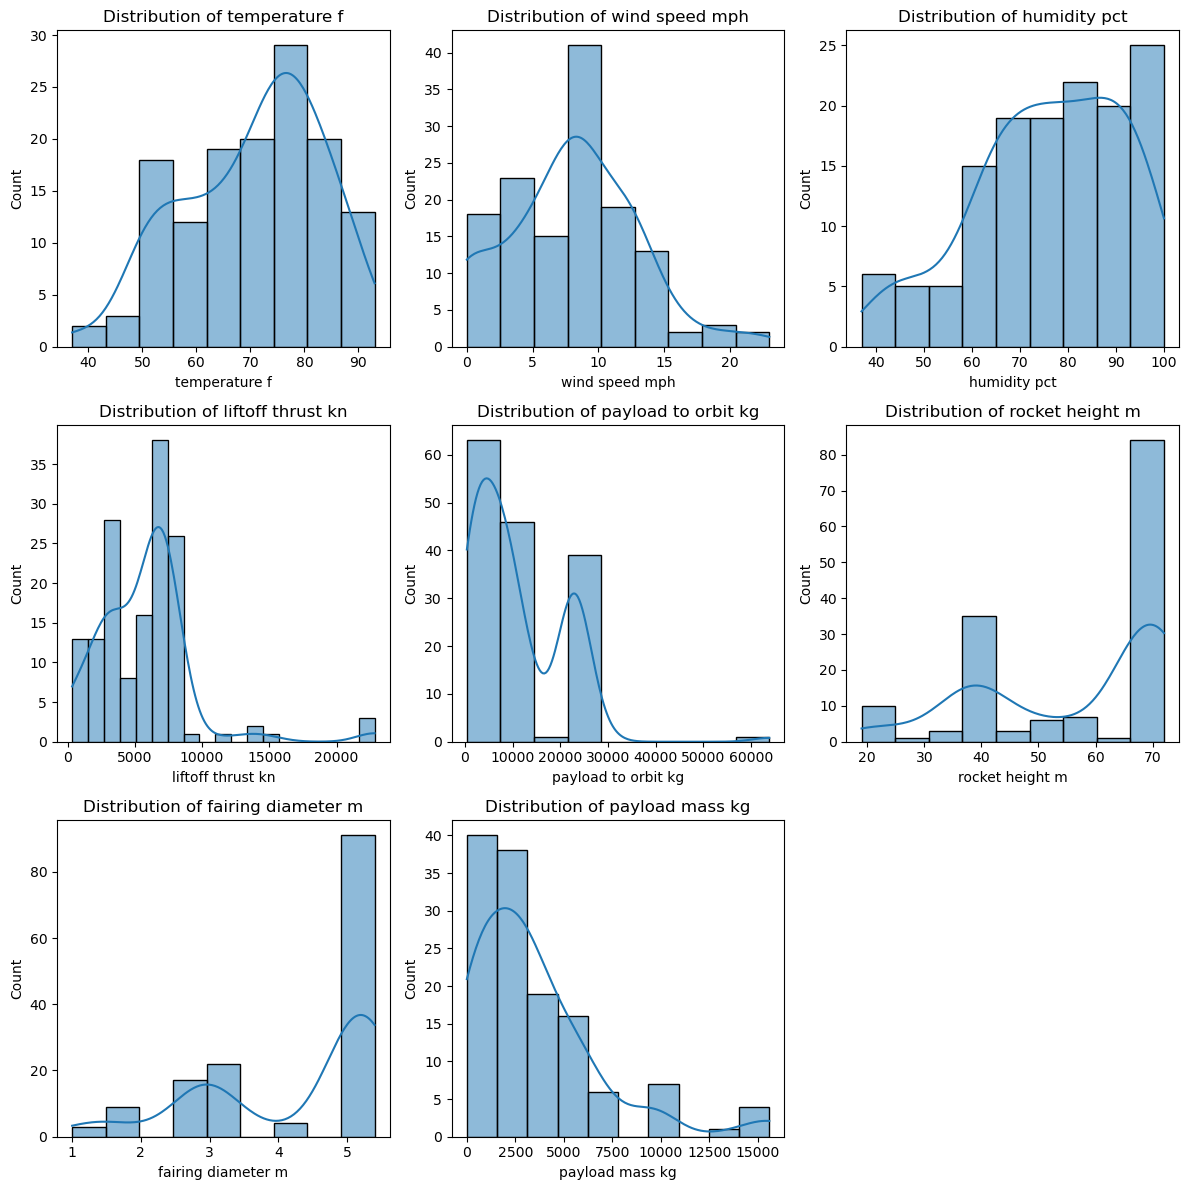

In [600]:
numeric_features = ['temperature f', 'wind speed mph', 'humidity pct', 'liftoff thrust kn', 'payload to orbit kg', 'rocket height m', 'fairing diameter m', 'payload mass kg']
plt.figure(figsize = (12, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_space[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

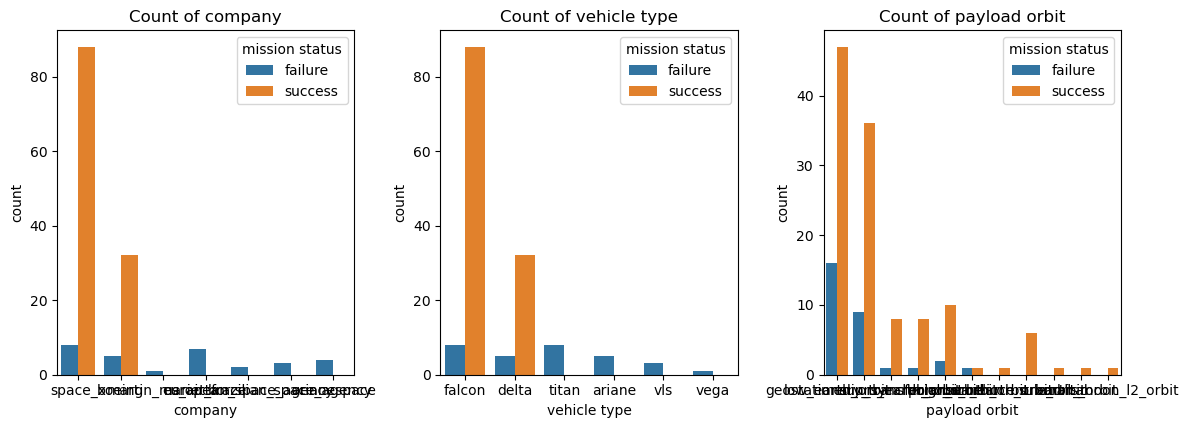

In [601]:
categorical_features = ['company', 'vehicle type', 'payload orbit']

plt.figure(figsize = (12, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data = df_space, x = feature, hue = 'mission status')
    plt.title(f"Count of {feature}")
    
plt.tight_layout()
plt.show()

## Univariate Analysis Summary

Bivariate Analysis

Bivariate analysis includes the simultanious analysis of two variables like fnding their relation, difference, and how one affect the other. It uses methods like Correlation, Covariance, Scatter Plots, etc to find the relationship between two variables

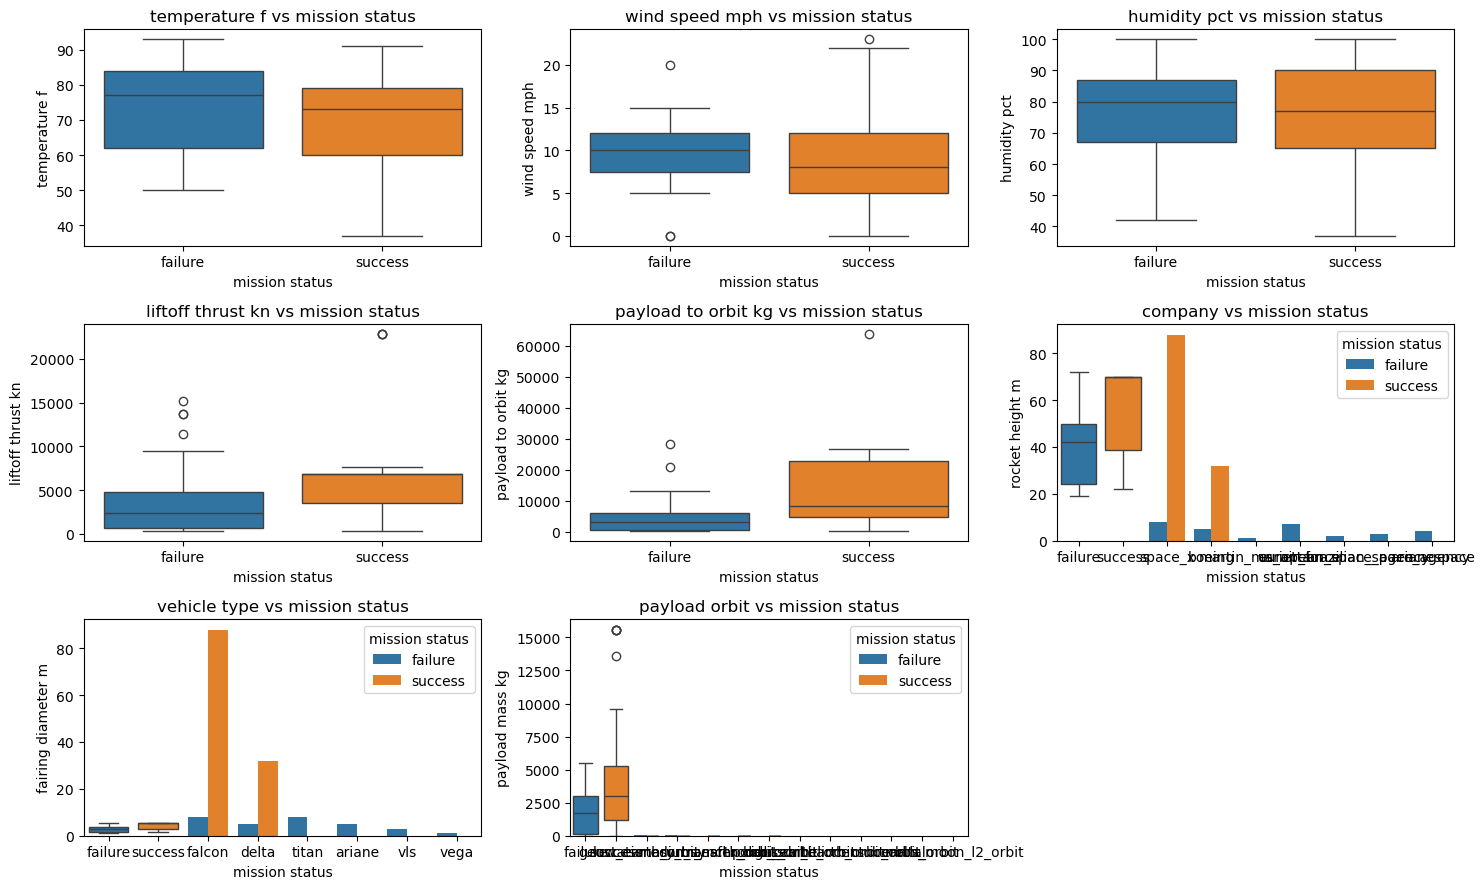

In [602]:
plt.figure(figsize=(15, 9))
numeric_features = ['temperature f', 'wind speed mph', 'humidity pct', 'liftoff thrust kn', 'payload to orbit kg', 'rocket height m', 'fairing diameter m', 'payload mass kg']
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data = df_space, x = 'mission status', y = feature, hue='mission status')
    plt.title(f"{feature} vs mission status")
categorical_features = ['company', 'vehicle type', 'payload orbit']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i + 5)
    sns.countplot(x = feature, hue='mission status', data = df_space)
    plt.title(f"{feature} vs mission status")
plt.tight_layout()
plt.show()

## Bivariate Analysis Summary

Multivariate Analysis

Multivairate analysis take into account multiple variables at the same time for analyzing variables simultaniously.

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/lz/09_nfmms6wb0mdjklklmq3gw0000gn/T/ipykernel_2175/1558510970.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


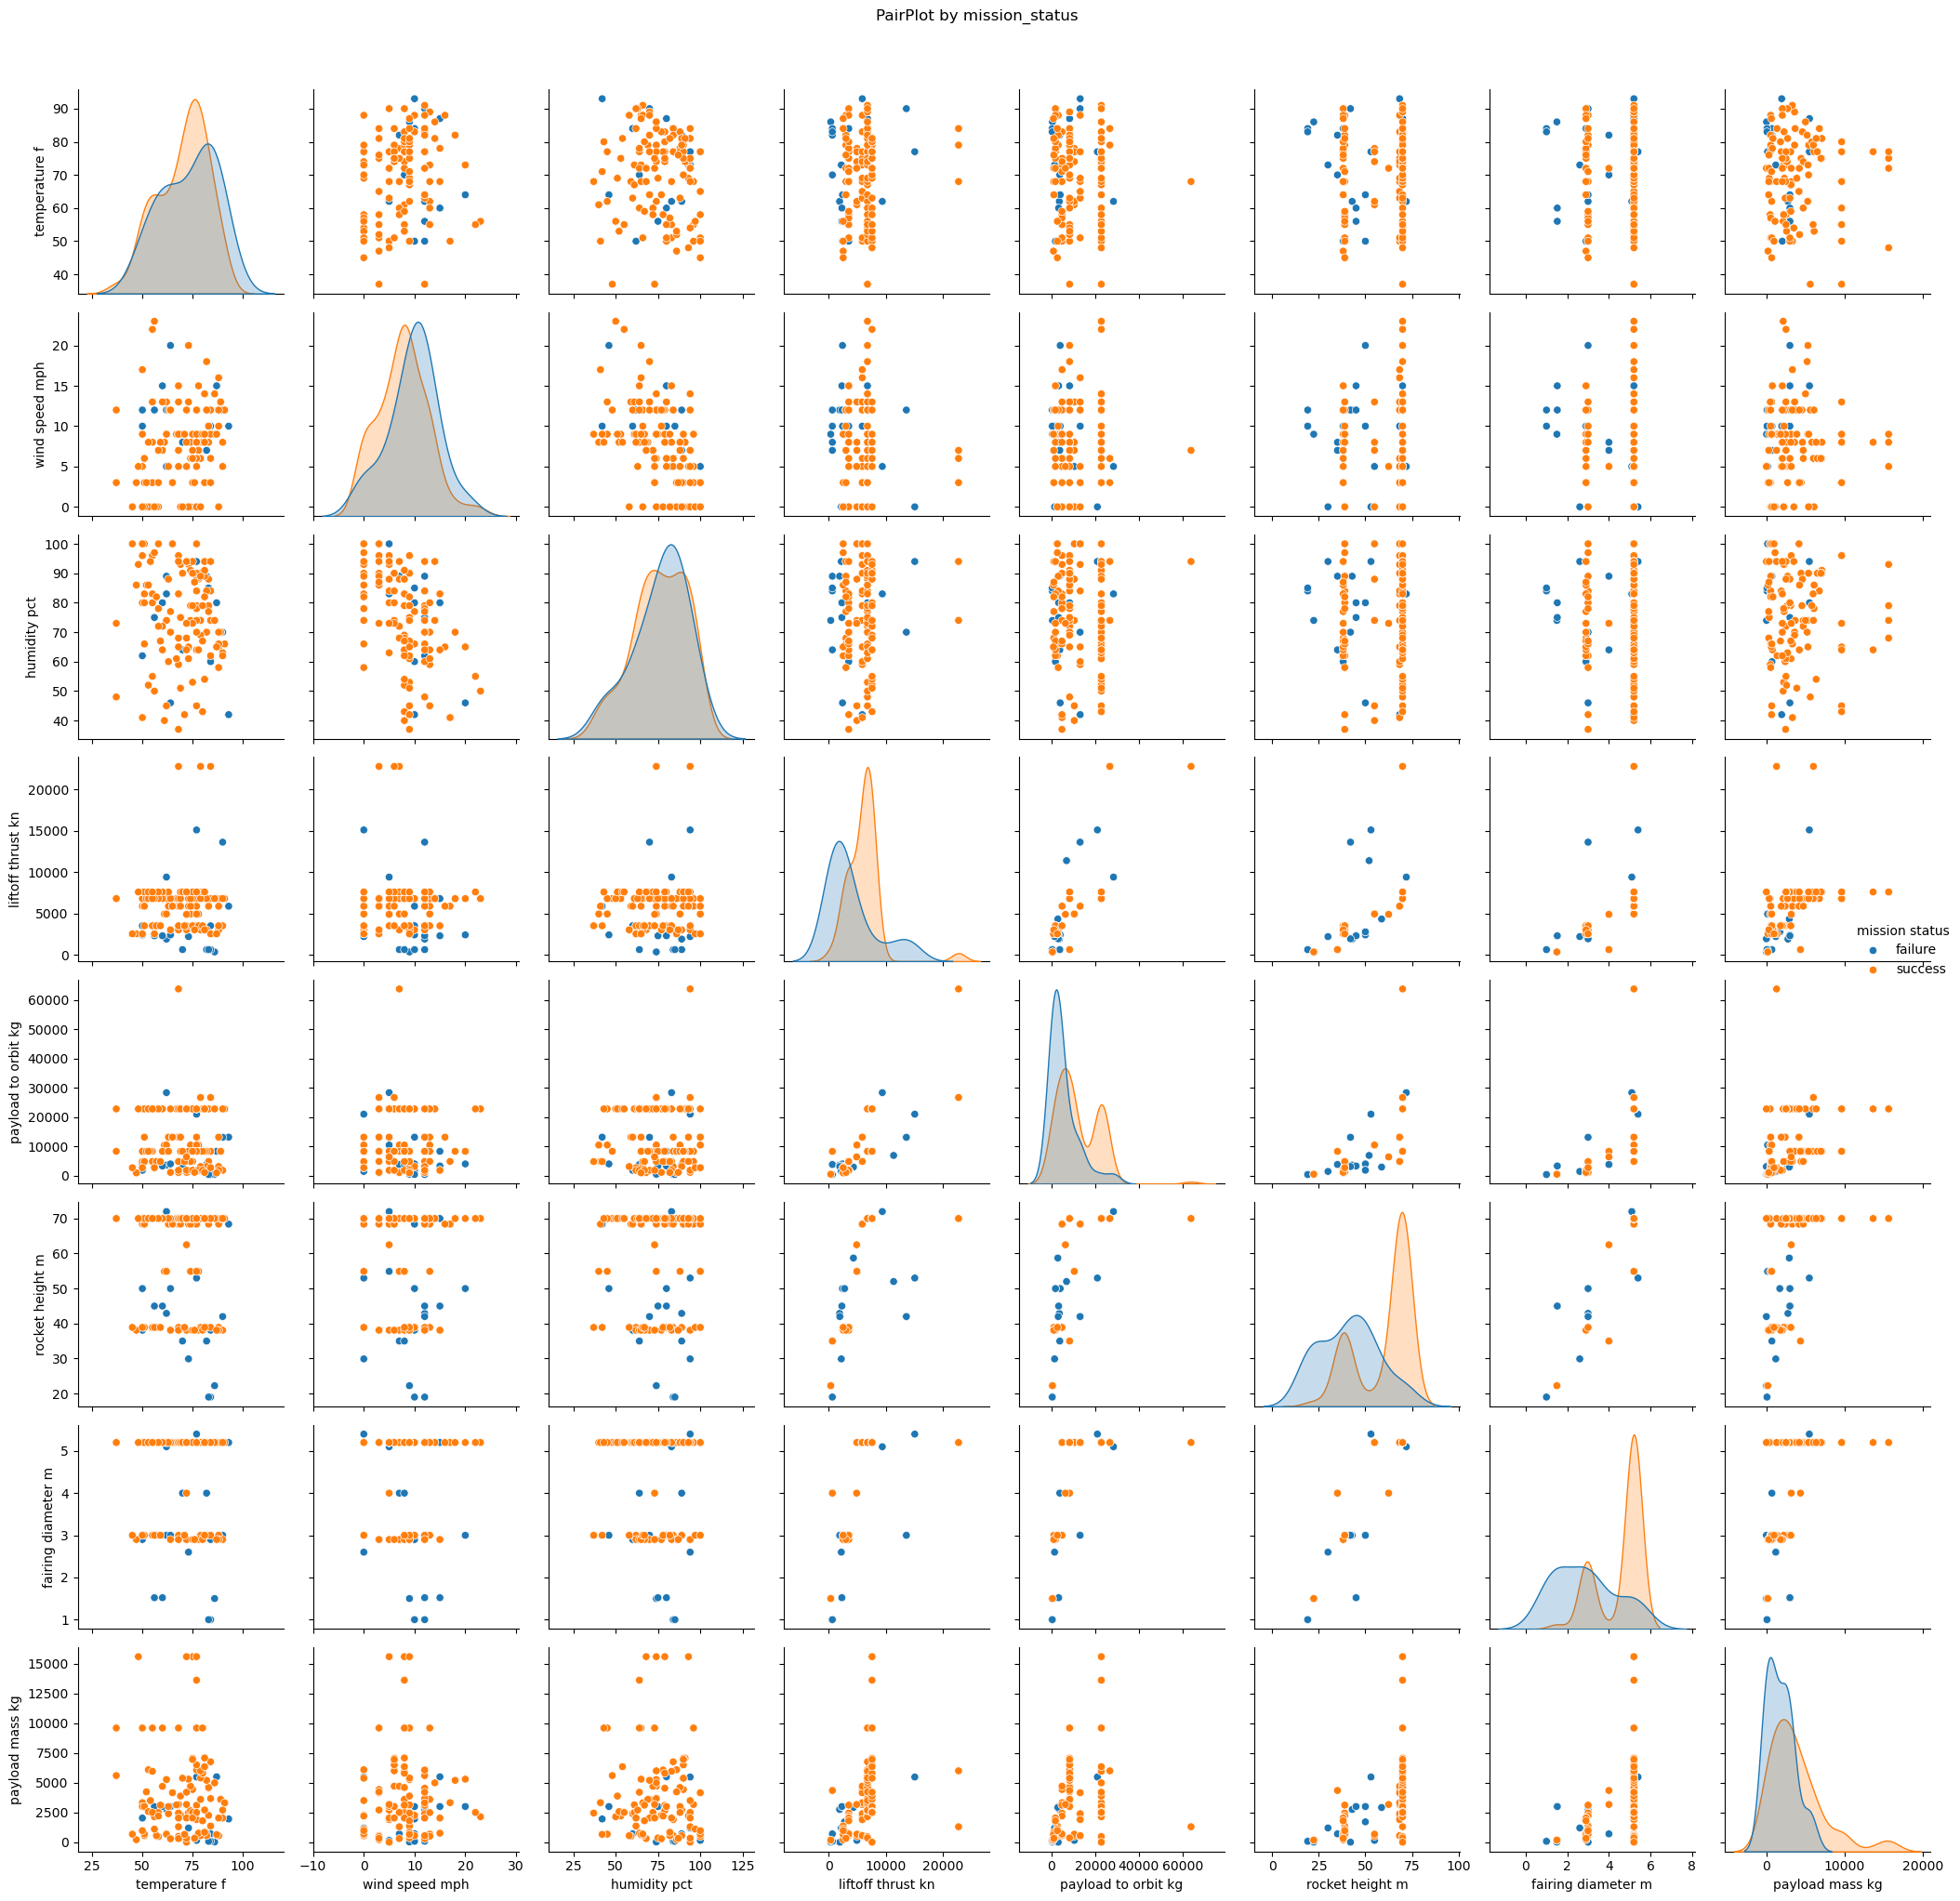

In [603]:
selected_features =  ['temperature f', 'wind speed mph', 'humidity pct', 'liftoff thrust kn', 'payload to orbit kg', 'rocket height m', 'fairing diameter m', 'payload mass kg',
                      'company', 'vehicle type', 'payload orbit', 'mission status']
sns.pairplot(df_space[selected_features], hue='mission status', diag_kind='kde', diag_kws=dict(common_norm=False))
plt.suptitle("PairPlot by mission_status", y = 1.02)
plt.tight_layout()
plt.show()

## Multivariate Analysis Summary

Correlation matrix

Correlation metrics can be used for  nding the relation between two variables and also helps to determine how strong the relations are

If the result of correlation between 2 variables is postive, it means there is a postive realtion and if one variable increases, the other increases as well.

If the result of the correlation between 2 variables are negative, it means there is a negative relation and if one variable increase, the other tend to decrease.

If the result revolves around zero, it means there is a weak correlation of there is not correlation at all.

In [604]:
corr_matrix = df_space[['temperature f', 'wind speed mph', 'humidity pct', 'liftoff thrust kn', 'payload to orbit kg', 'rocket height m', 'fairing diameter m', 'payload mass kg']].corr()
corr_matrix

temperature f  wind speed mph  humidity pct  \
temperature f             1.000000        0.185167     -0.077857   
wind speed mph            0.185167        1.000000     -0.517528   
humidity pct             -0.077857       -0.517528      1.000000   
liftoff thrust kn         0.072410       -0.059878      0.087398   
payload to orbit kg      -0.032070        0.033013     -0.046768   
rocket height m          -0.068913        0.046411      0.016386   
fairing diameter m       -0.025954       -0.045152      0.027238   
payload mass kg          -0.057346        0.051481     -0.047294   

                     liftoff thrust kn  payload to orbit kg  rocket height m  \
temperature f                 0.072410            -0.032070        -0.068913   
wind speed mph               -0.059878             0.033013         0.046411   
humidity pct                  0.087398            -0.046768         0.016386   
liftoff thrust kn             1.000000             0.727658         0.639518   
payload to orbit kg           0.727658             1.000000         0.661349   
rocket height m               0.639518             0.661349         1.000000   
fairing diameter m            0.627743             0.643199         0.949243   
payload mass kg               0.414938             0.397969         0.539369   

                     fairing diameter m  payload mass kg  
temperature f                 -0.025954        -0.057346  
wind speed mph                -0.045152         0.051481  
humidity pct                   0.027238        -0.047294  
liftoff thrust kn              0.627743         0.414938  
payload to orbit kg            0.643199         0.397969  
rocket height m                0.949243         0.539369  
fairing diameter m             1.000000         0.496026  
payload mass kg                0.496026         1.000000

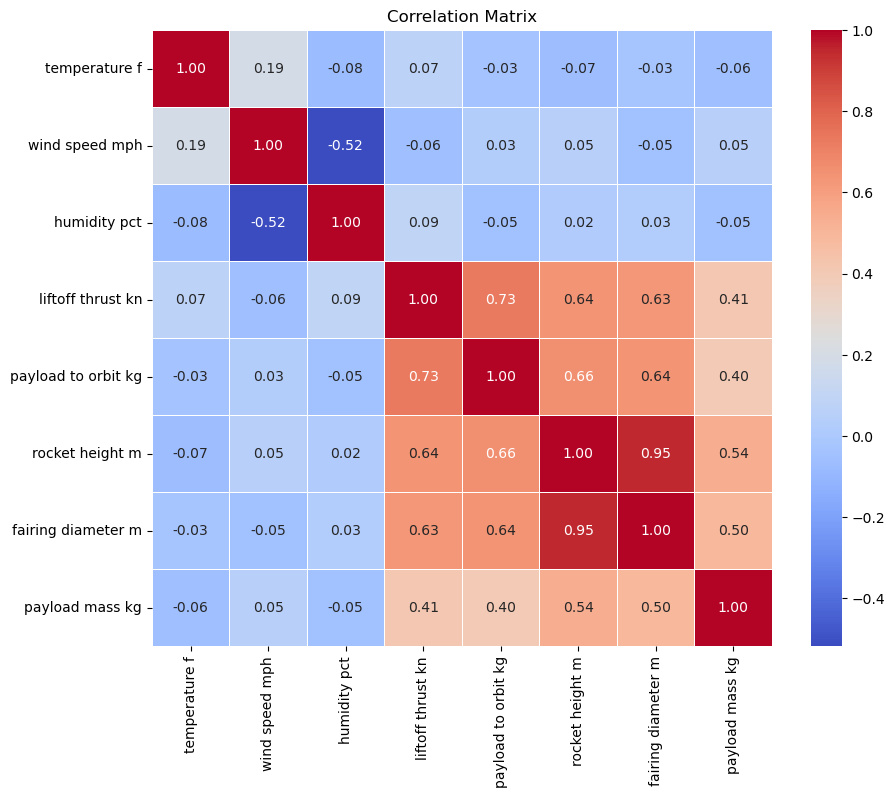

In [605]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [606]:
np.fill_diagonal(corr_matrix.values, np.nan)
print("Maximum Correlation:", corr_matrix.max().max())
print("Minimum Correlation:", corr_matrix.min().min())

Maximum Correlation: 0.9492434792066025
Minimum Correlation: -0.517527745162029


## Correlation Matrix Summary

In [607]:
df_space.columns

Index(['company', 'temperature f', 'wind speed mph', 'humidity pct',
       'vehicle type', 'liftoff thrust kn', 'payload to orbit kg',
       'rocket height m', 'fairing diameter m', 'payload mass kg',
       'payload orbit', 'mission status'],
      dtype='object')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


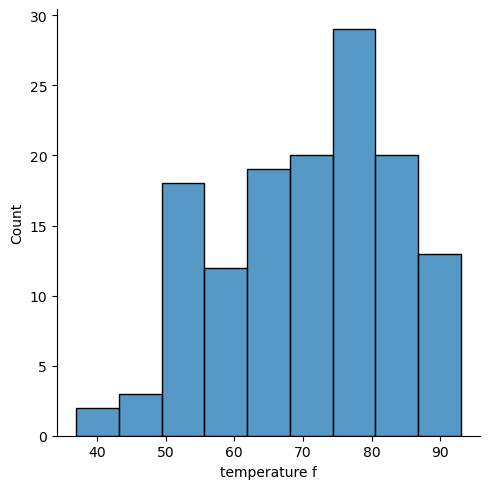

In [608]:
sns.displot(data=df_space, x='temperature f')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


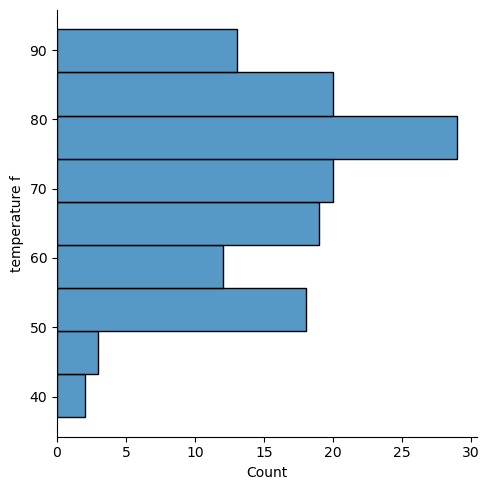

In [609]:
sns.displot(data=df_space, y='temperature f')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


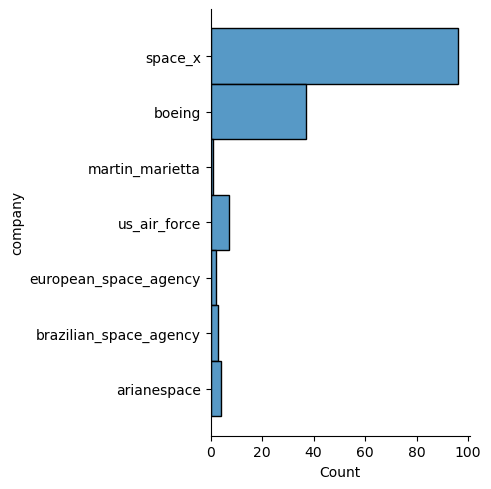

In [610]:
sns.displot(data=df_space, y='company')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


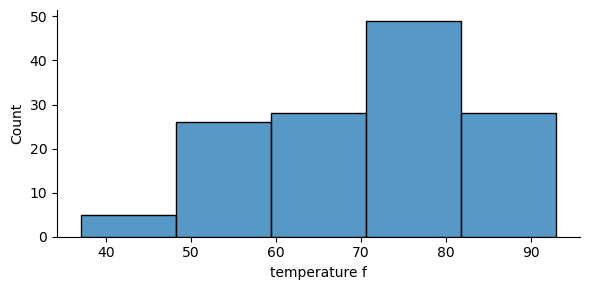

In [611]:
sns.displot(data=df_space, x='temperature f', bins=5, height=3, aspect=2)

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


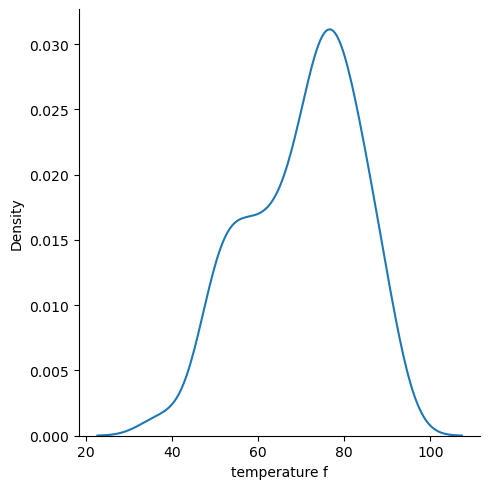

In [612]:
sns.displot(data=df_space, x='temperature f',kind='kde')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


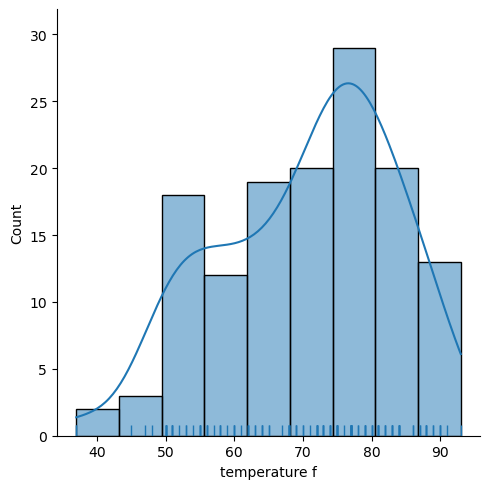

In [613]:
sns.displot(data=df_space, x='temperature f',kde=True, rug=True)
# Rug shows each observations in X axis. Shows 1 tick mark at each value

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


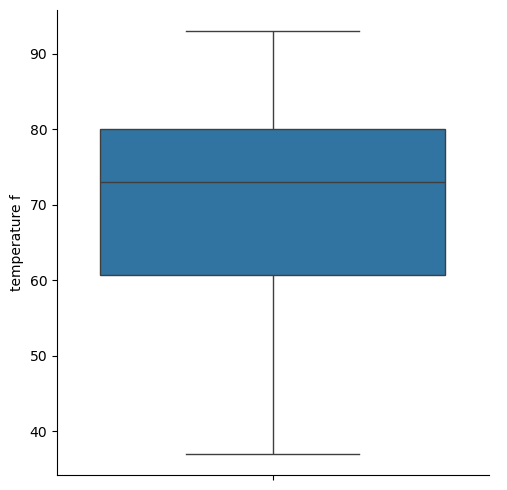

In [614]:
sns.catplot(data=df_space, y='temperature f', kind='box')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


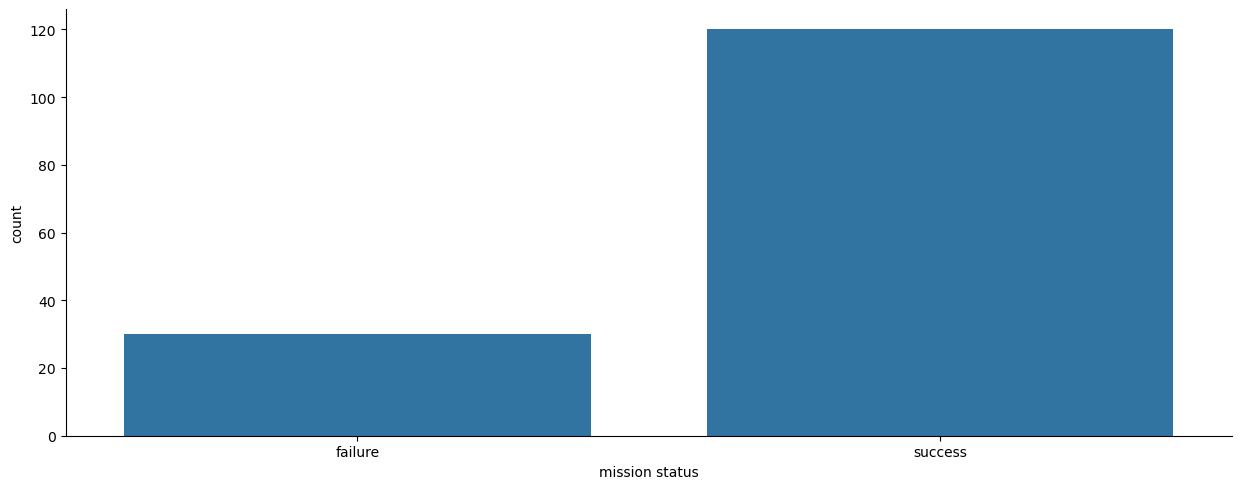

In [615]:
sns.catplot(data=df_space, x='mission status', kind='count', aspect=2.5)

In [616]:
sns.catplot(data=df_space, x='company', kind='count', aspect=2.5)

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


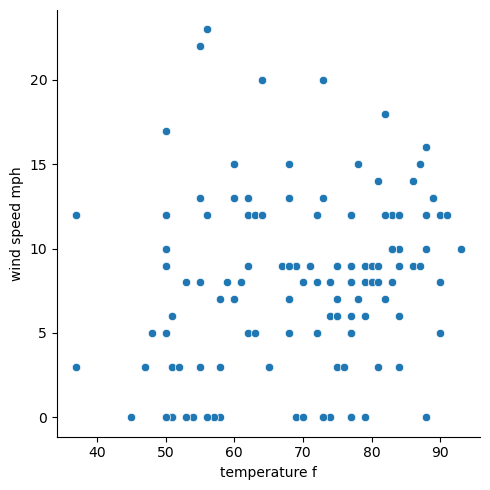

In [617]:
sns.relplot(data=df_space, x='temperature f', y='wind speed mph', kind='scatter')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[CV 1/5] END ........................alpha=0.01;, score=0.292 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.583 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.417 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.667 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.292 total time=   0.0s
[CV 3/5] END .........................alpha=0.5;, score=0.500 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.417 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.292 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.500 total time=   0.0s
[CV 5/5] END .........................alpha=0.5;, score=0.583 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.500 total time=   0.0s
[CV 2/5] END ..........................alpha=10;, score=0.417 total time=   0.0s
[CV 5/5] END ...............

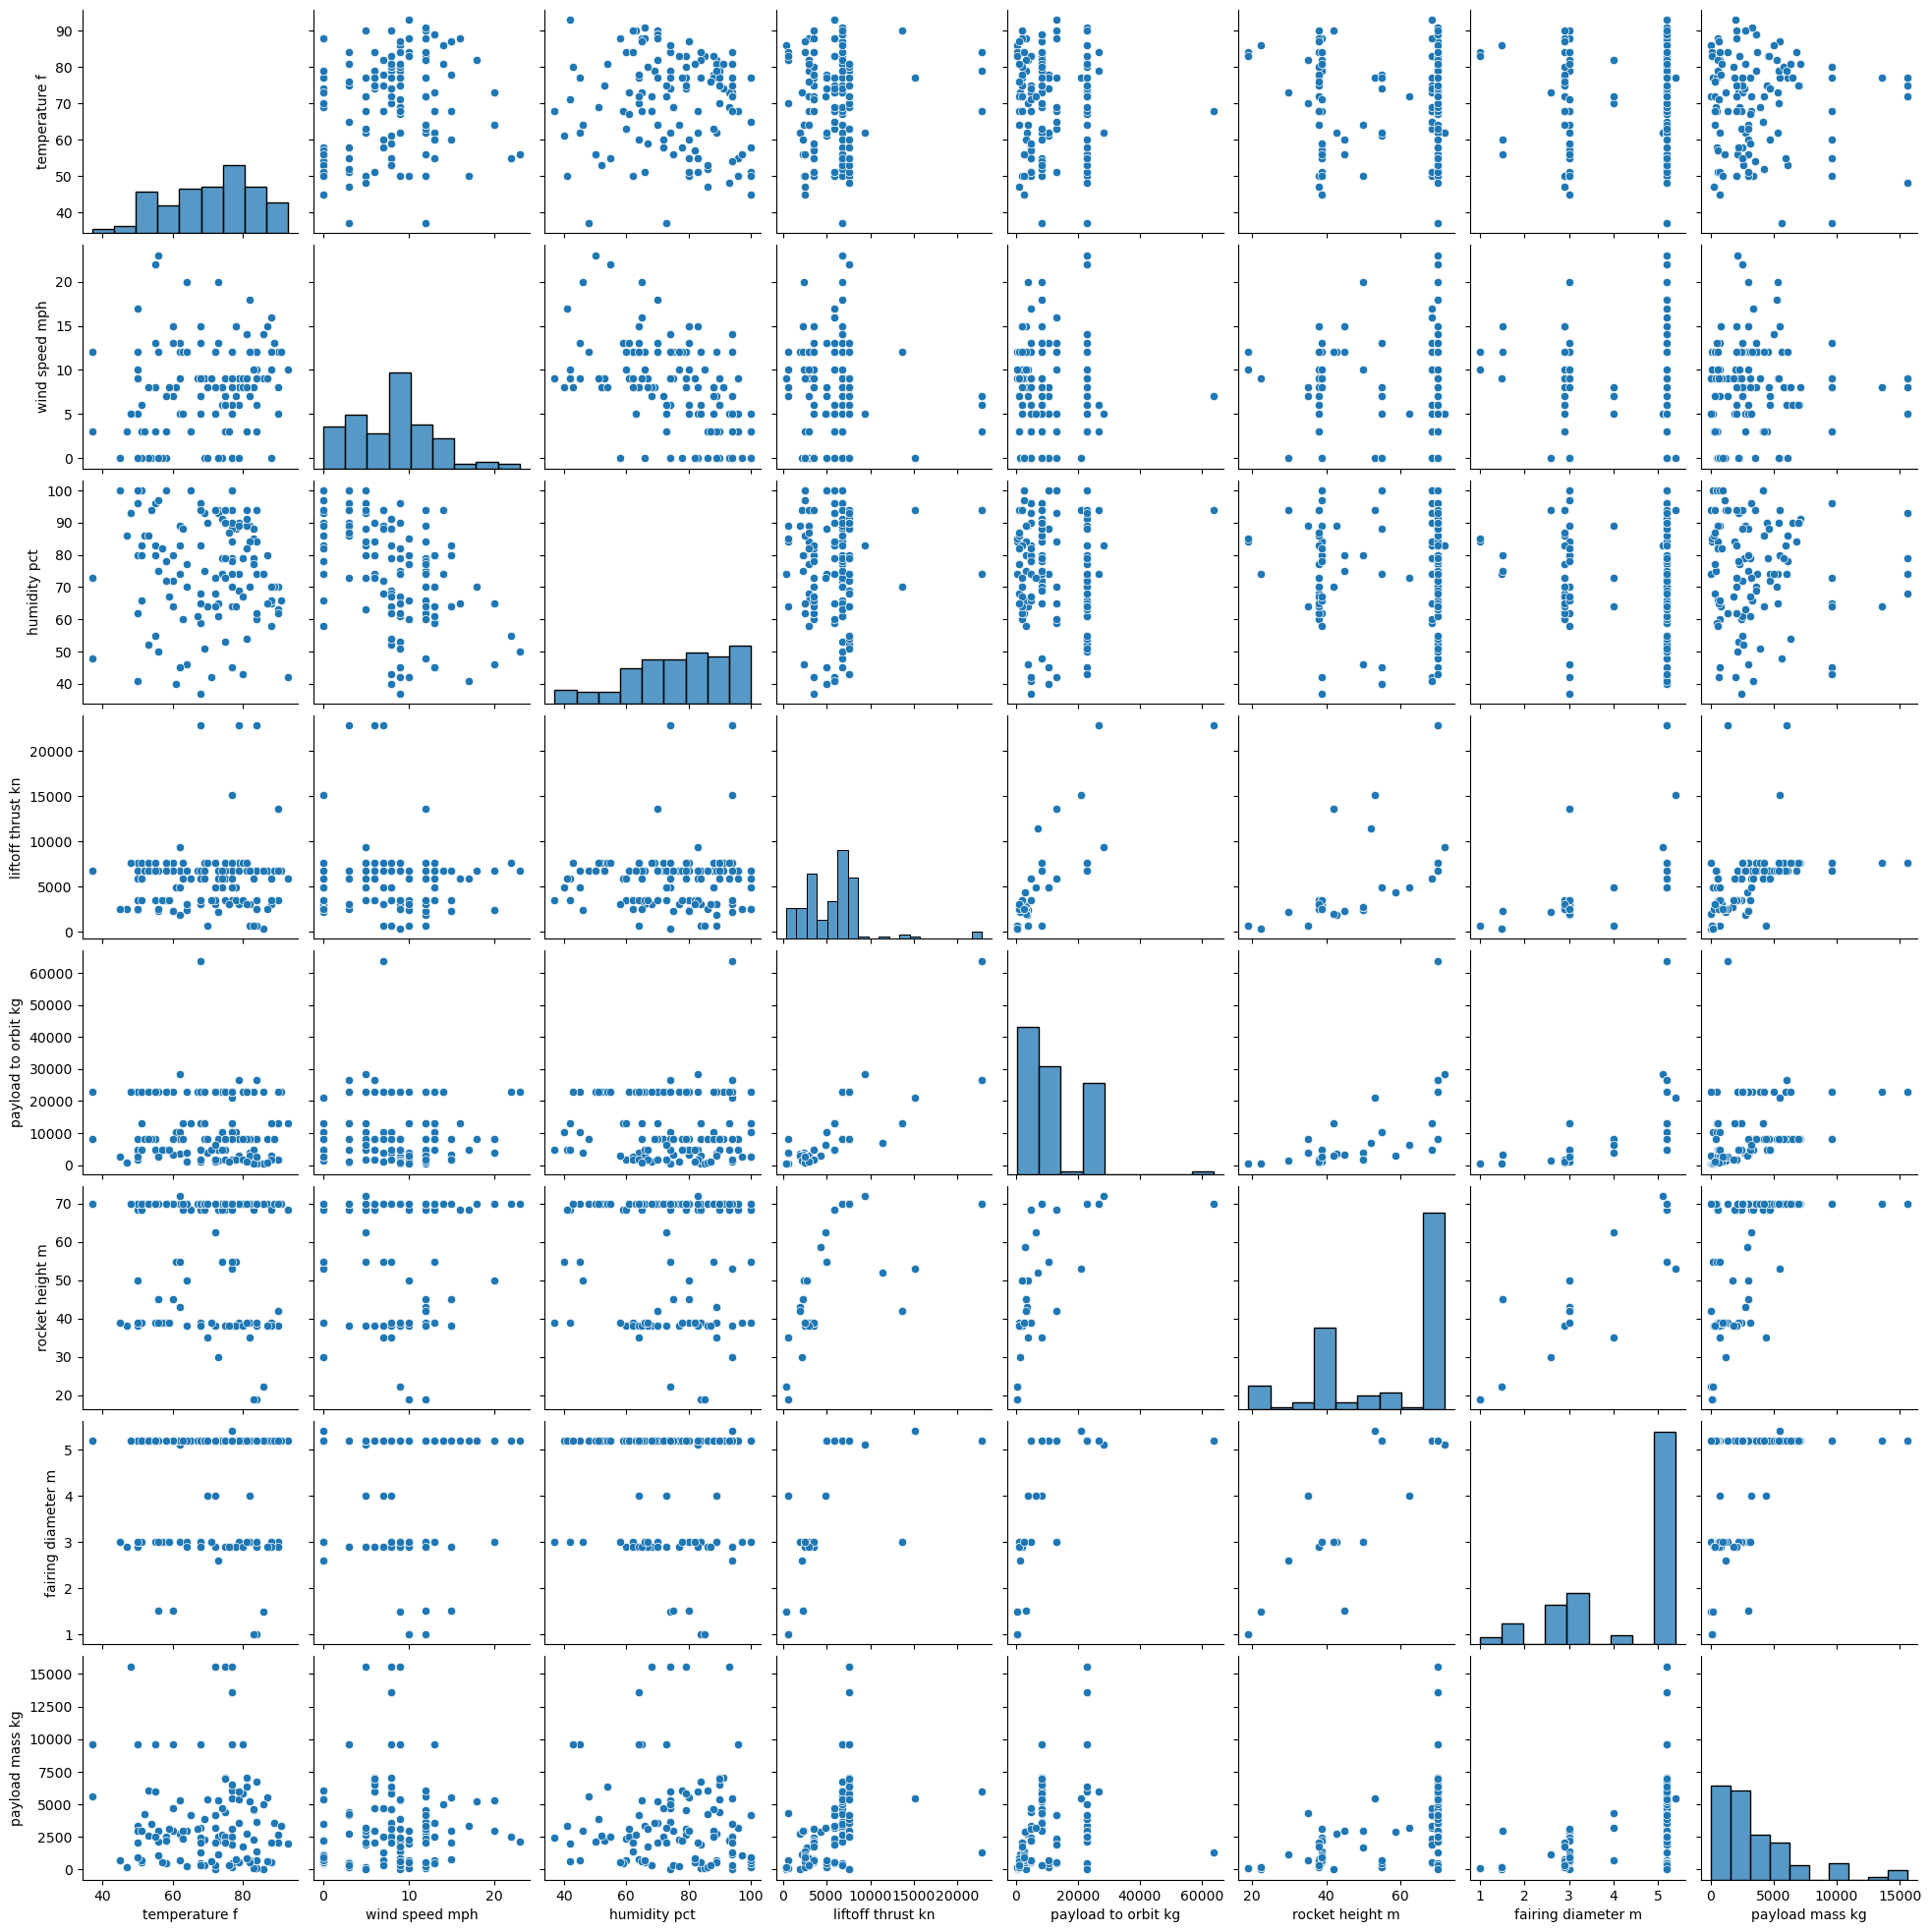

In [618]:
sns.pairplot(data=df_space) #For numeric features

In [619]:
sns.pairplot(data=df_space[['temperature f', 'wind speed mph', 'humidity pct']])
#Histogram of same fields and other pair fields are scattered

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


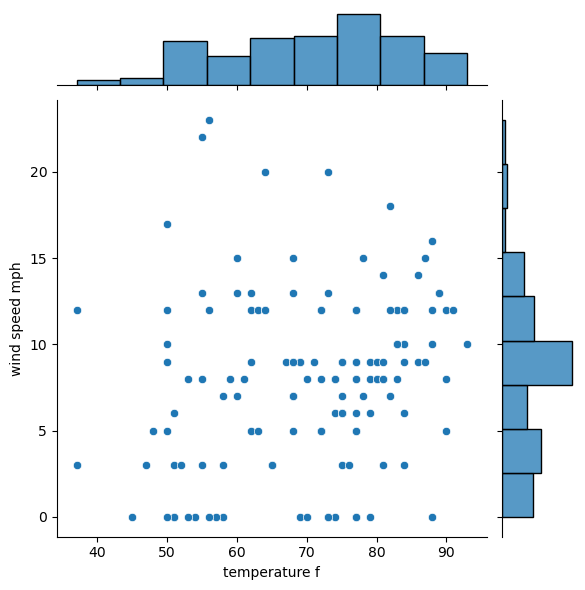

In [620]:
sns.jointplot(data=df_space, x='temperature f', y='wind speed mph')

In [621]:
df_space[['temperature f', 'wind speed mph', 'humidity pct', 'liftoff thrust kn', 'payload to orbit kg', 'rocket height m', 'fairing diameter m', 'payload mass kg']].corr()

temperature f  wind speed mph  humidity pct  \
temperature f             1.000000        0.185167     -0.077857   
wind speed mph            0.185167        1.000000     -0.517528   
humidity pct             -0.077857       -0.517528      1.000000   
liftoff thrust kn         0.072410       -0.059878      0.087398   
payload to orbit kg      -0.032070        0.033013     -0.046768   
rocket height m          -0.068913        0.046411      0.016386   
fairing diameter m       -0.025954       -0.045152      0.027238   
payload mass kg          -0.057346        0.051481     -0.047294   

                     liftoff thrust kn  payload to orbit kg  rocket height m  \
temperature f                 0.072410            -0.032070        -0.068913   
wind speed mph               -0.059878             0.033013         0.046411   
humidity pct                  0.087398            -0.046768         0.016386   
liftoff thrust kn             1.000000             0.727658         0.639518   
payload to orbit kg           0.727658             1.000000         0.661349   
rocket height m               0.639518             0.661349         1.000000   
fairing diameter m            0.627743             0.643199         0.949243   
payload mass kg               0.414938             0.397969         0.539369   

                     fairing diameter m  payload mass kg  
temperature f                 -0.025954        -0.057346  
wind speed mph                -0.045152         0.051481  
humidity pct                   0.027238        -0.047294  
liftoff thrust kn              0.627743         0.414938  
payload to orbit kg            0.643199         0.397969  
rocket height m                0.949243         0.539369  
fairing diameter m             1.000000         0.496026  
payload mass kg                0.496026         1.000000

<Axes: >

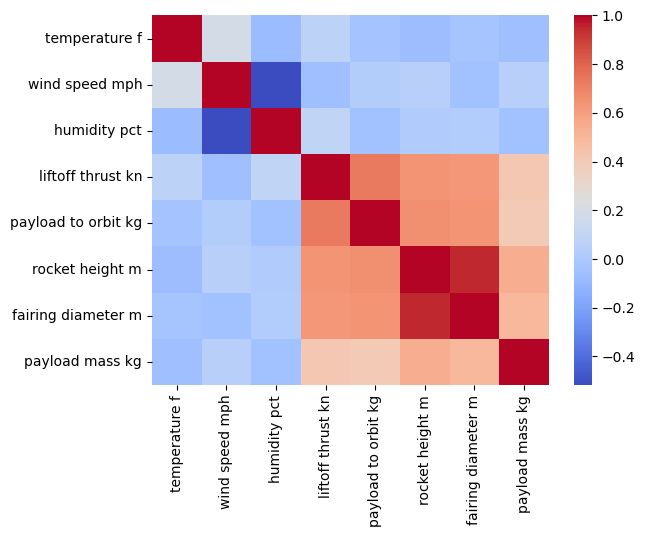

In [622]:
sns.heatmap(data=df_space[['temperature f', 'wind speed mph', 'humidity pct', 'liftoff thrust kn', 'payload to orbit kg', 'rocket height m', 'fairing diameter m', 'payload mass kg']].corr(), cmap='coolwarm')
#Blue represnts negative relationship and red represents positive

In [623]:
# Visualizing using 1 categorical and 1 numerical

In [624]:
sns.displot(data=df_space,x='temperature f',hue='company') #hue one plot with different companies

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [625]:
sns.displot(data=df_space,x='temperature f',col='company') #Plot separately in each column

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [626]:
# Using Line chart

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


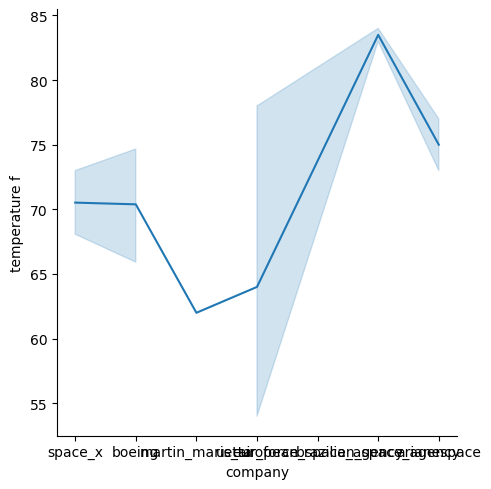

In [627]:
sns.relplot(data=df_space, x='company', y='temperature f', kind='line')

In [628]:
df_space.groupby('company')['temperature f'].mean()

company
arianespace               75.000000
boeing                    70.388889
brazilian_space_agency    83.500000
european_space_agency           NaN
martin_marietta           62.000000
space_x                   70.522222
us_air_force              64.000000
Name: temperature f, dtype: float64

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


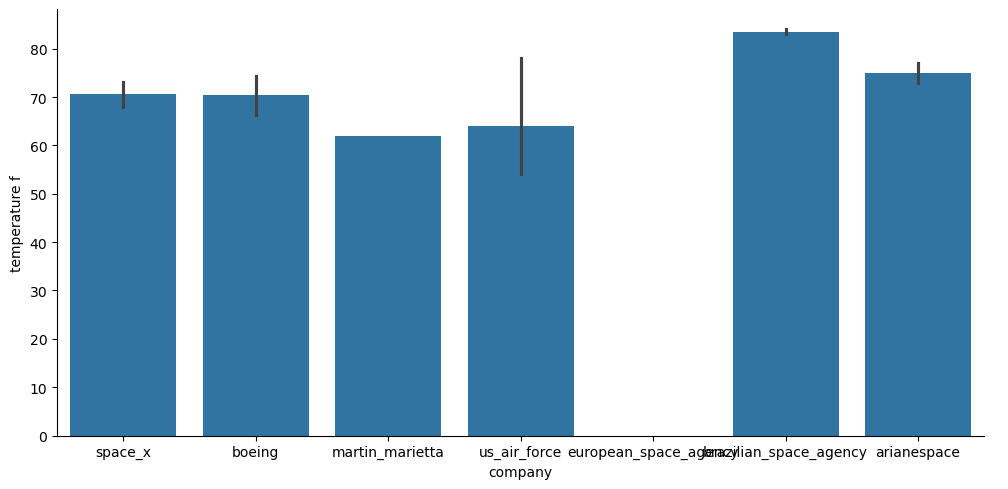

In [629]:
sns.catplot(data=df_space,x='company',y='temperature f', kind='bar', aspect=2 )

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


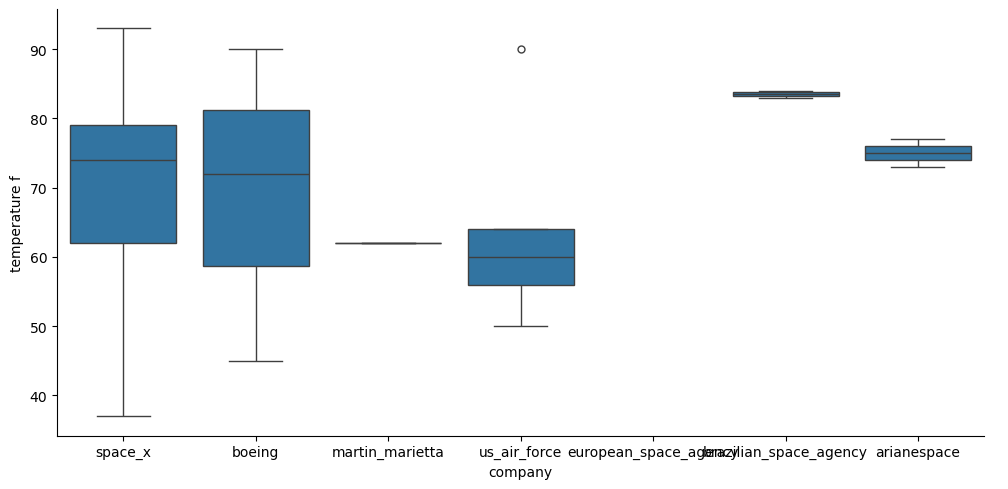

In [630]:
sns.catplot(data=df_space,x='company',y='temperature f', kind='box', aspect=2 )
#Box information about the quartiles

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


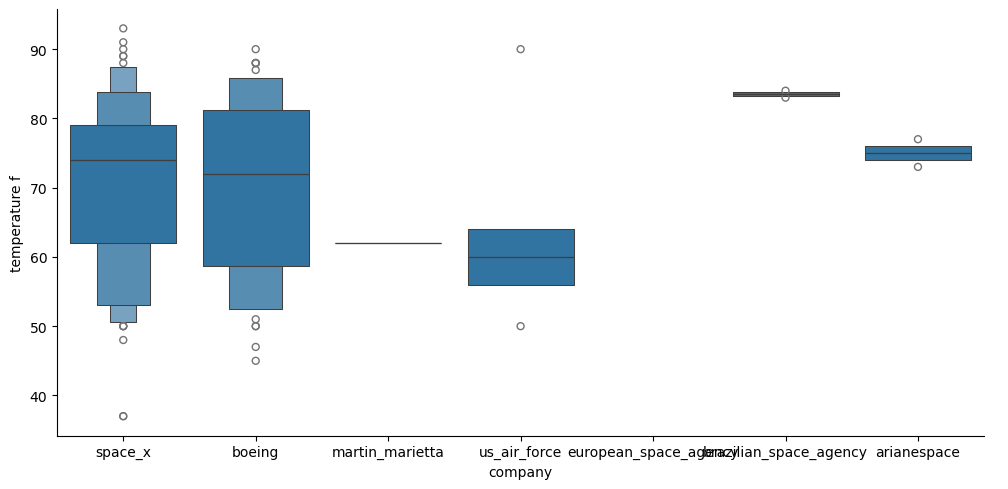

In [631]:
sns.catplot(data=df_space,x='company',y='temperature f', kind='boxen', aspect=2 )
#Extra boxes showing distributions outside the quartiles

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


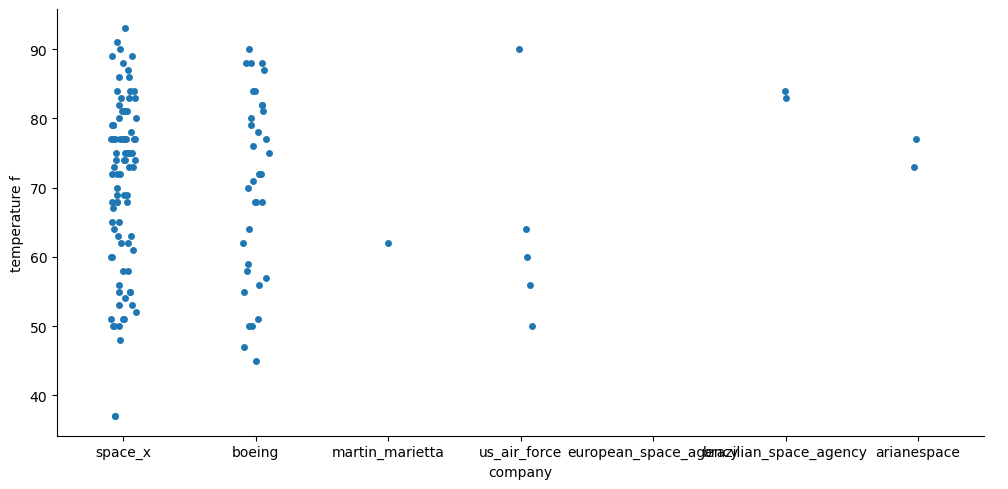

In [632]:
sns.catplot(data=df_space,x='company',y='temperature f', kind='strip', aspect=2 )
#Basically a scatter plot.

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


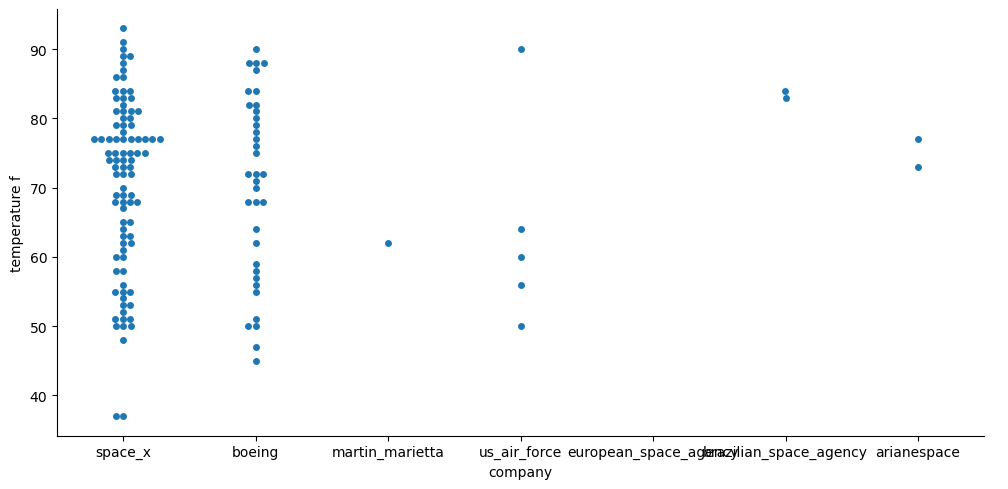

In [633]:
sns.catplot(data=df_space[df_space['liftoff thrust kn']>200],x='company',y='temperature f', kind='swarm', aspect=2 )

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


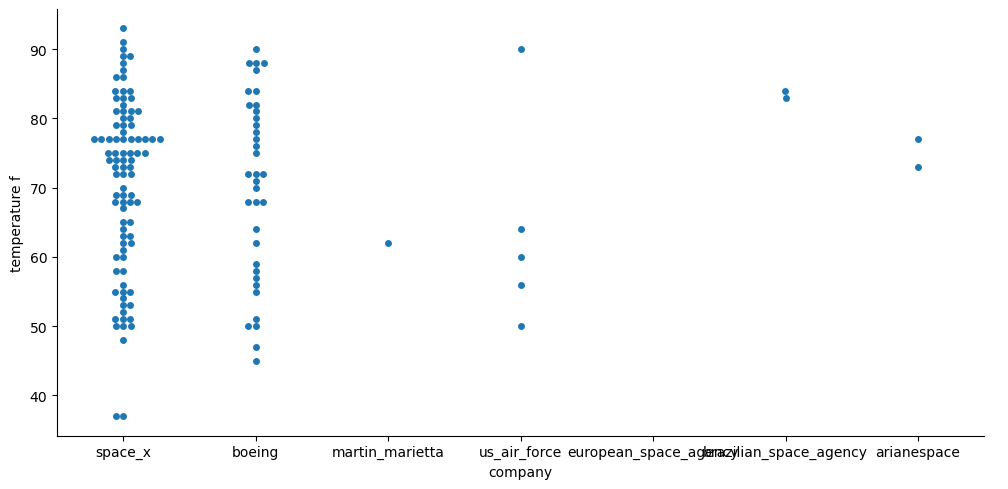

In [634]:
sns.catplot(data=df_space,x='company',y='temperature f', kind='swarm', aspect=2 )

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


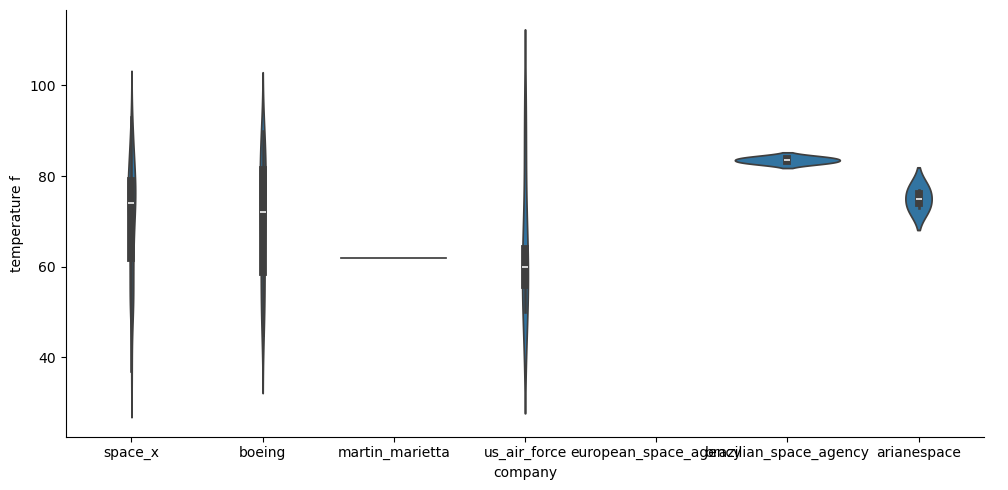

In [635]:
sns.catplot(data=df_space,x='company',y='temperature f', kind='violin', aspect=2 )
#Quartle values are shown in box

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


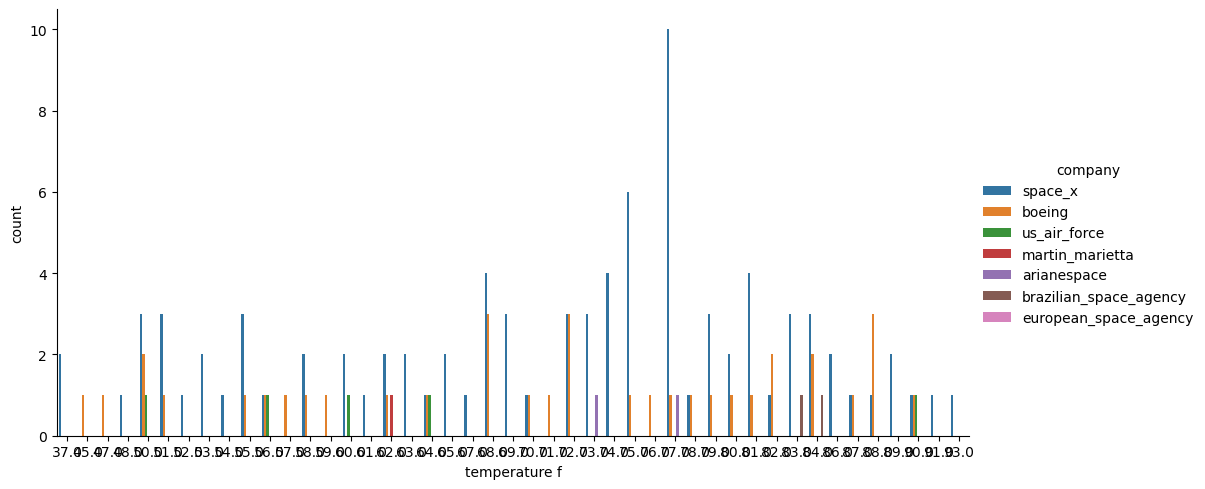

In [636]:
sns.catplot(data=df_space,x='temperature f', kind='count',hue='company', aspect=2)

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


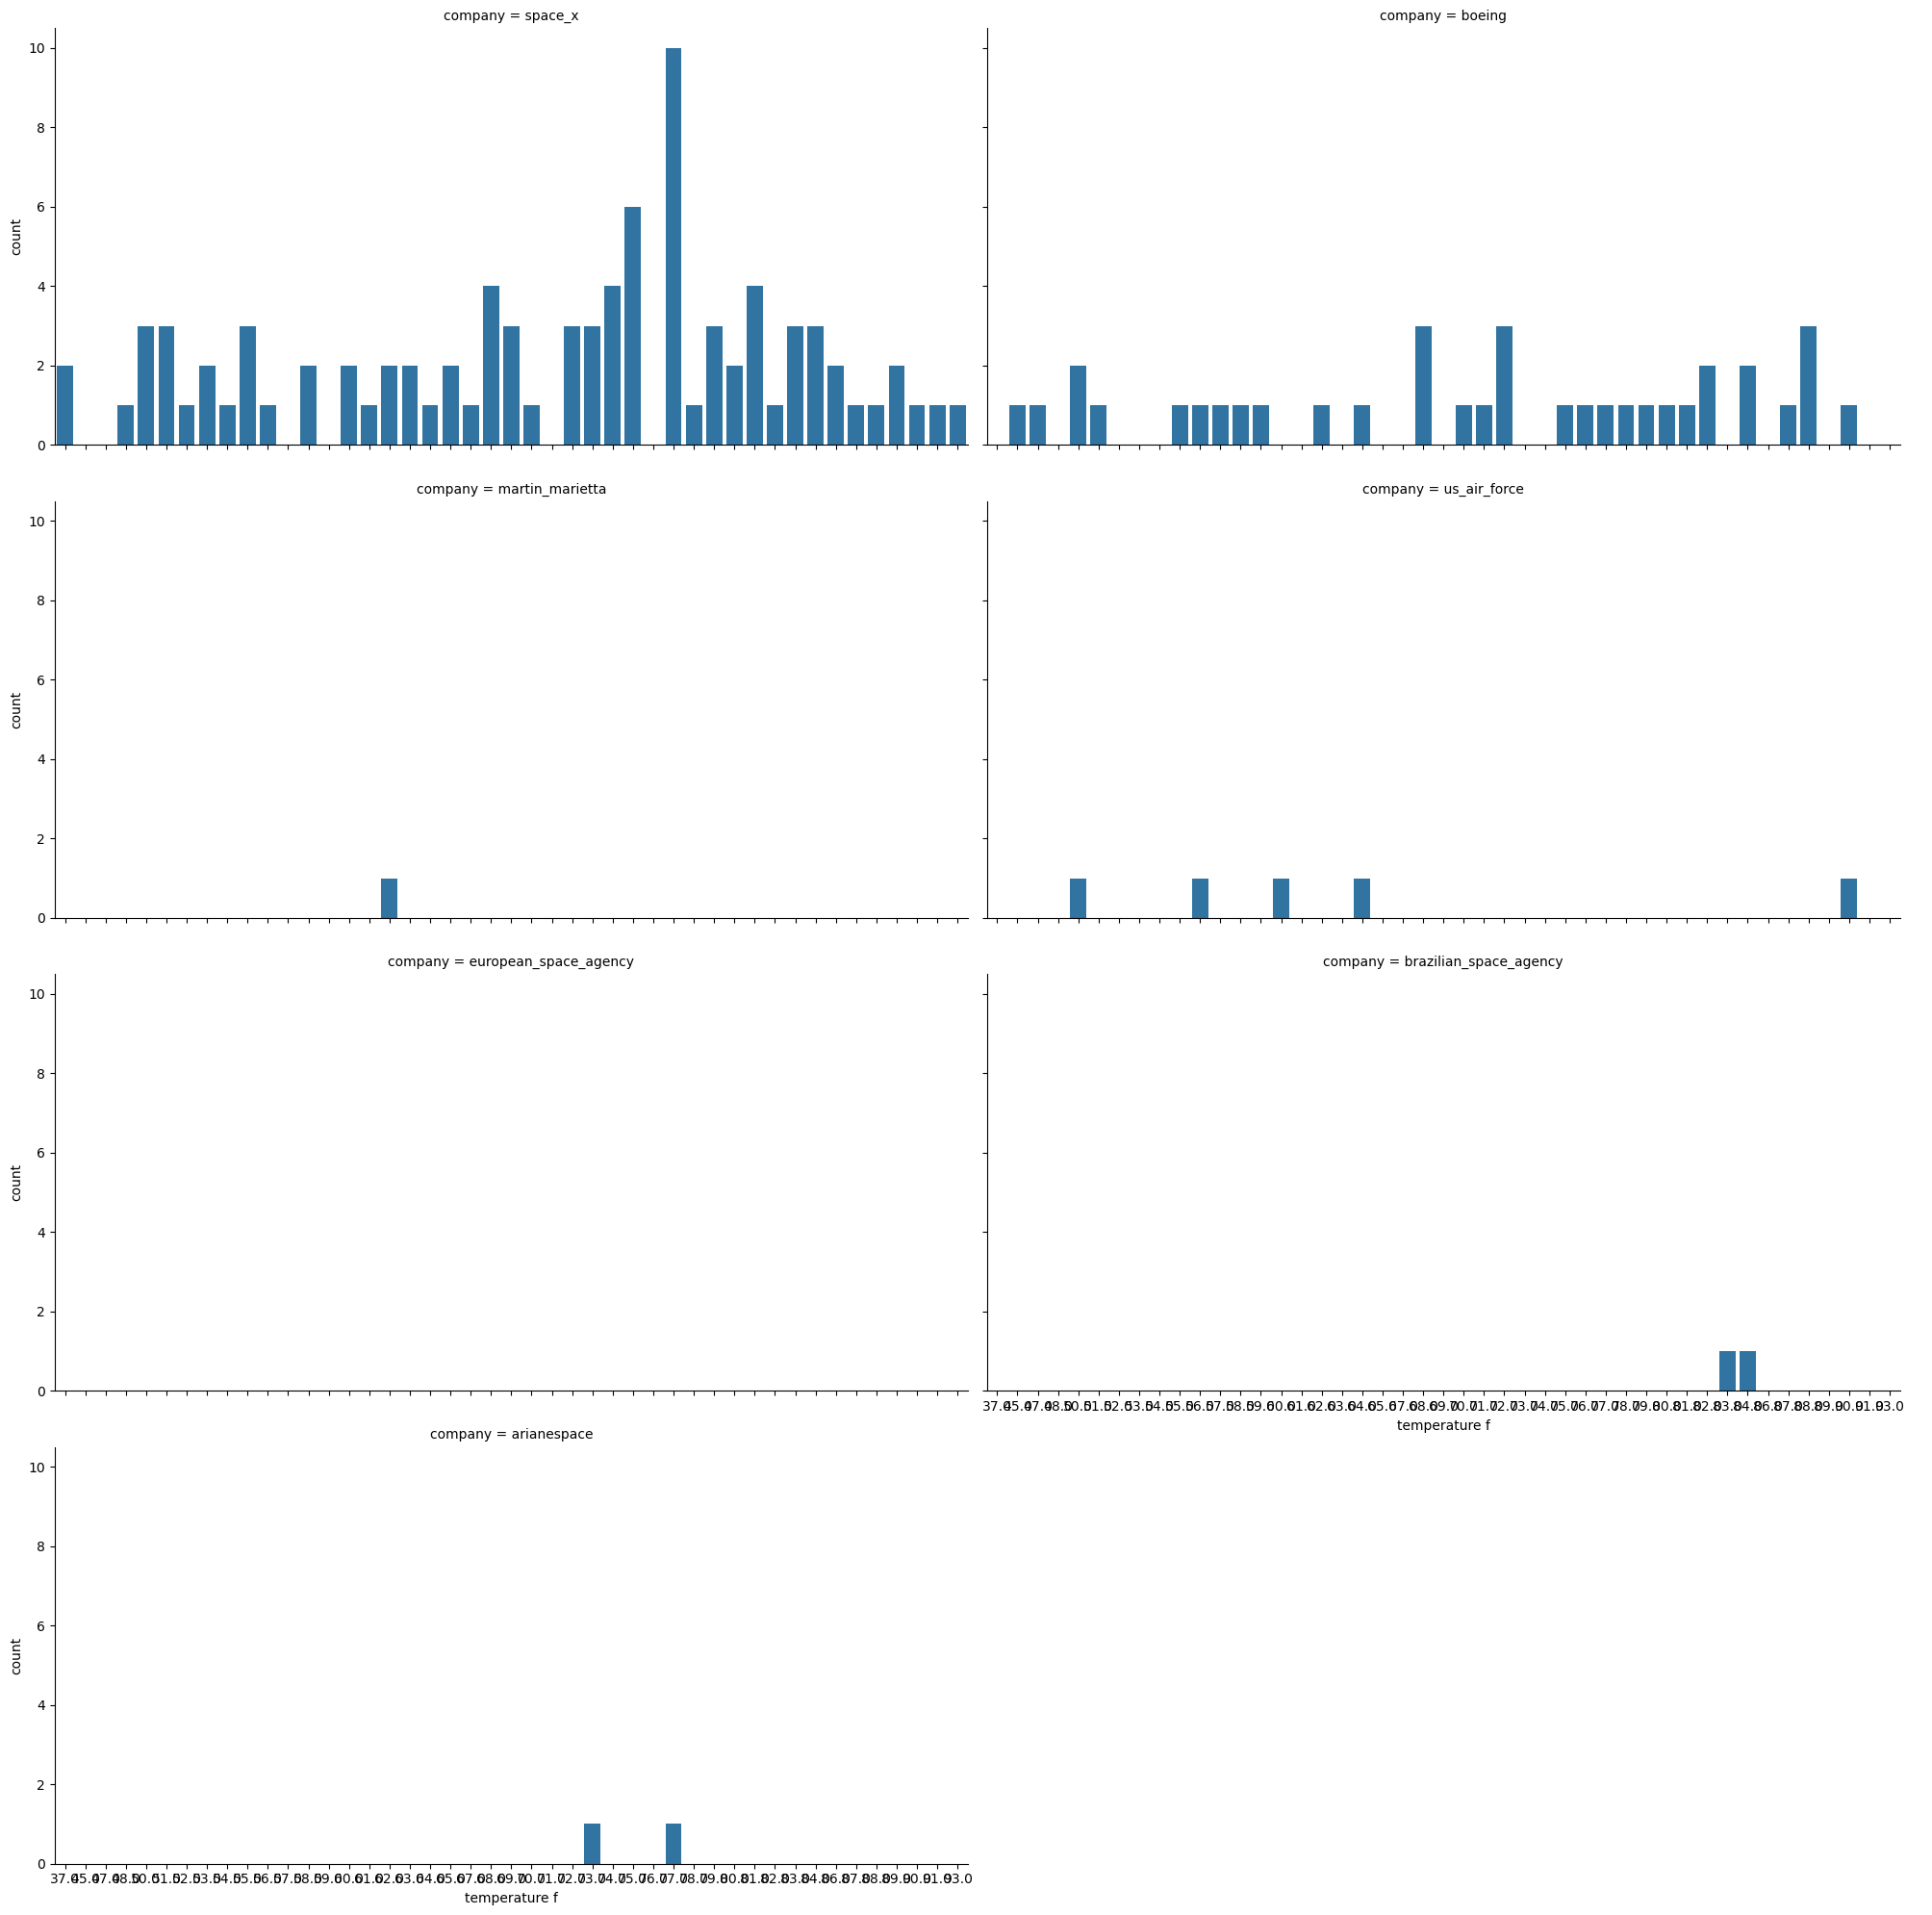

In [637]:
sns.catplot(data=df_space,x='temperature f', kind='count',col='company',col_wrap=2, aspect=2)

In [638]:
# Relationship of multiple features

In [639]:
df_space.columns

Index(['company', 'temperature f', 'wind speed mph', 'humidity pct',
       'vehicle type', 'liftoff thrust kn', 'payload to orbit kg',
       'rocket height m', 'fairing diameter m', 'payload mass kg',
       'payload orbit', 'mission status'],
      dtype='object')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


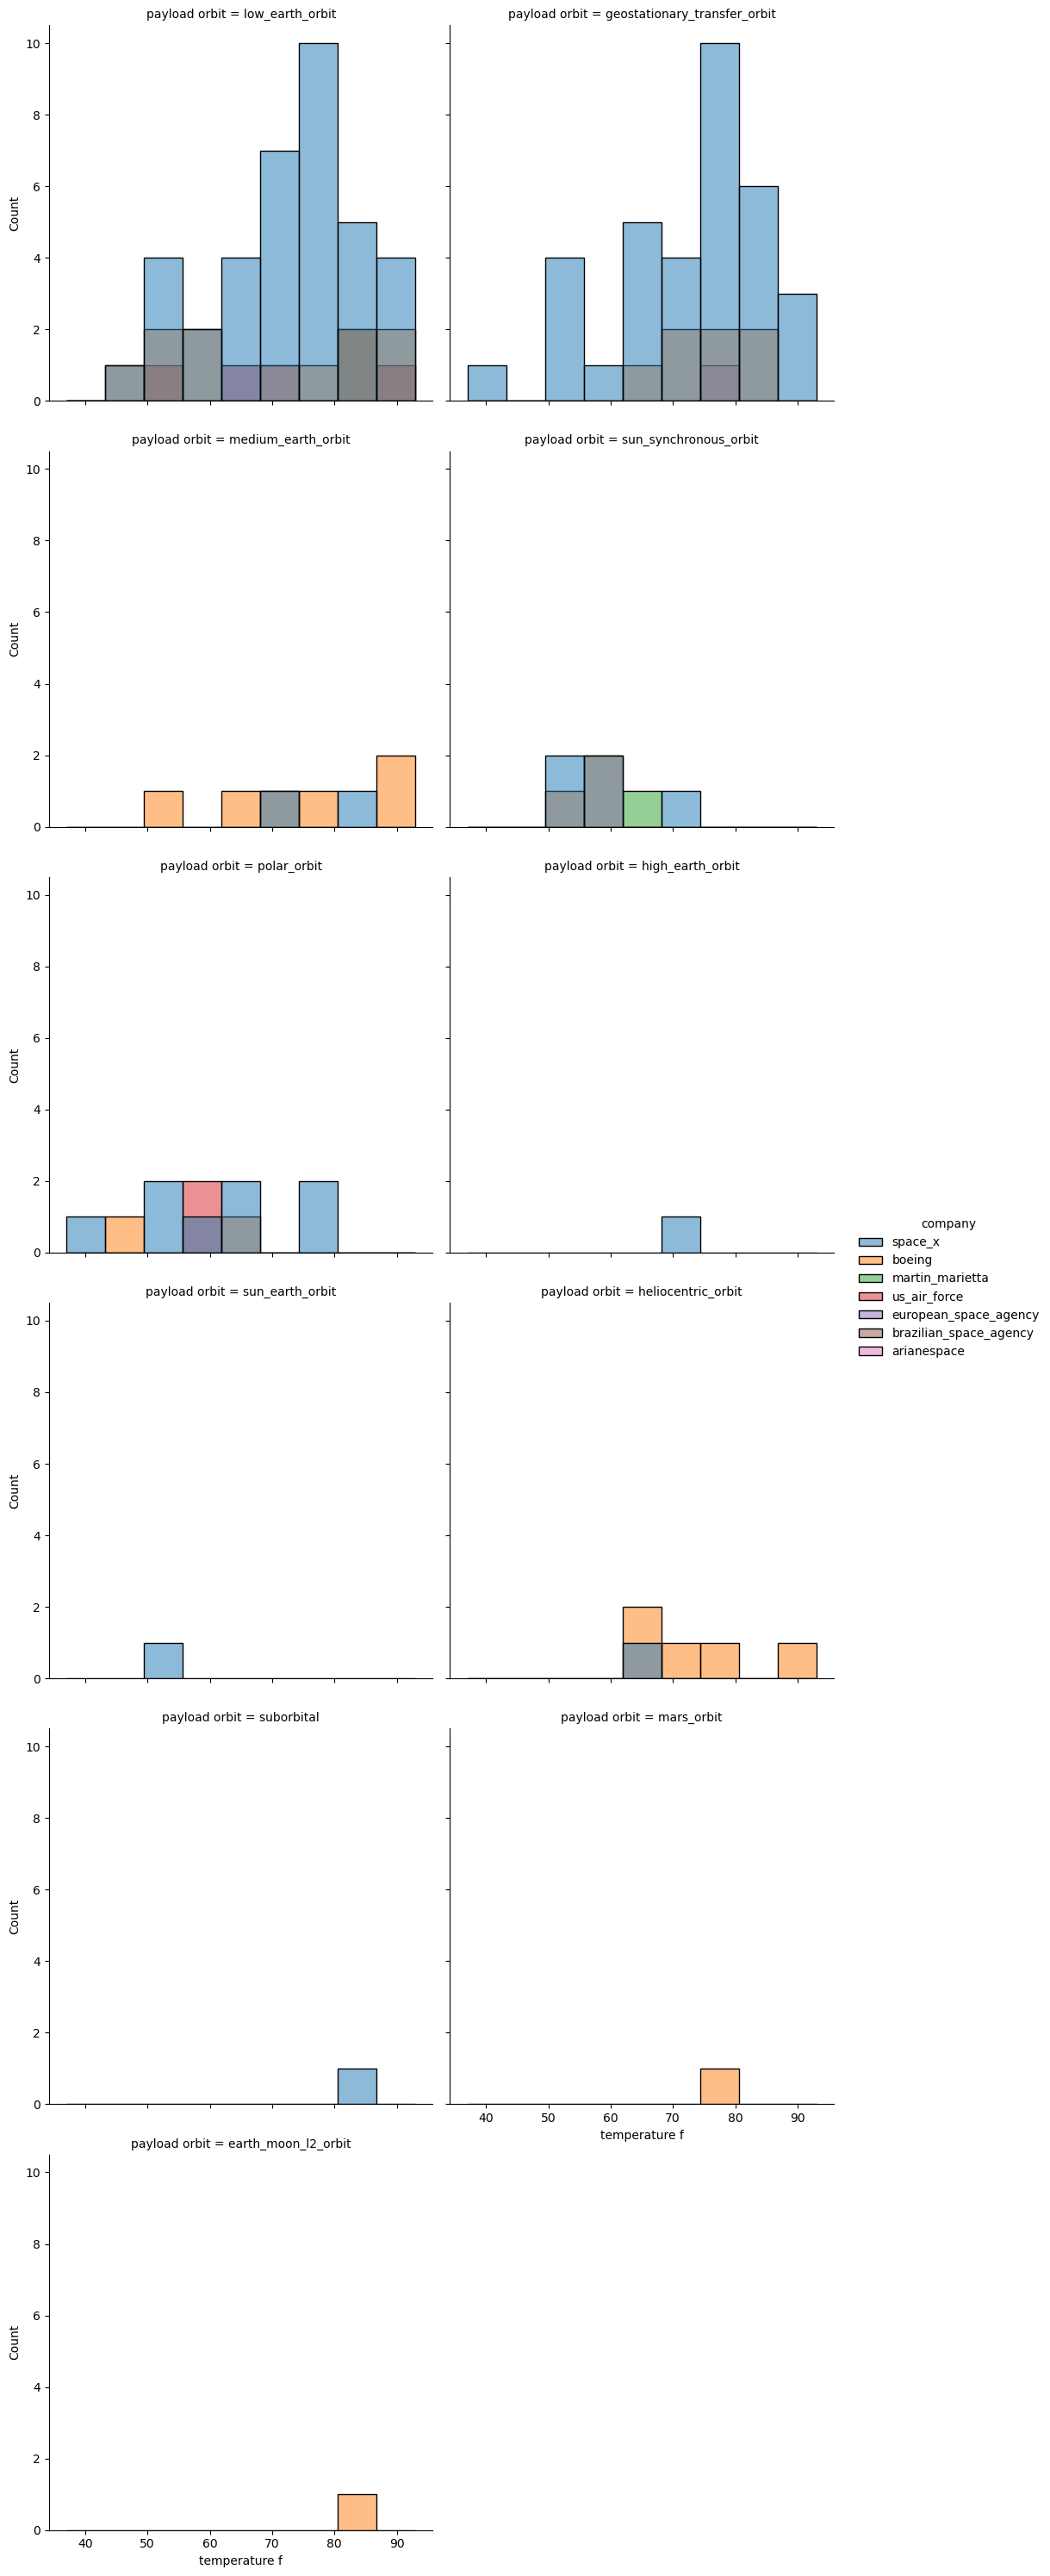

In [640]:
sns.displot(data=df_space,x='temperature f',hue='company',col_wrap=2,col='payload orbit')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


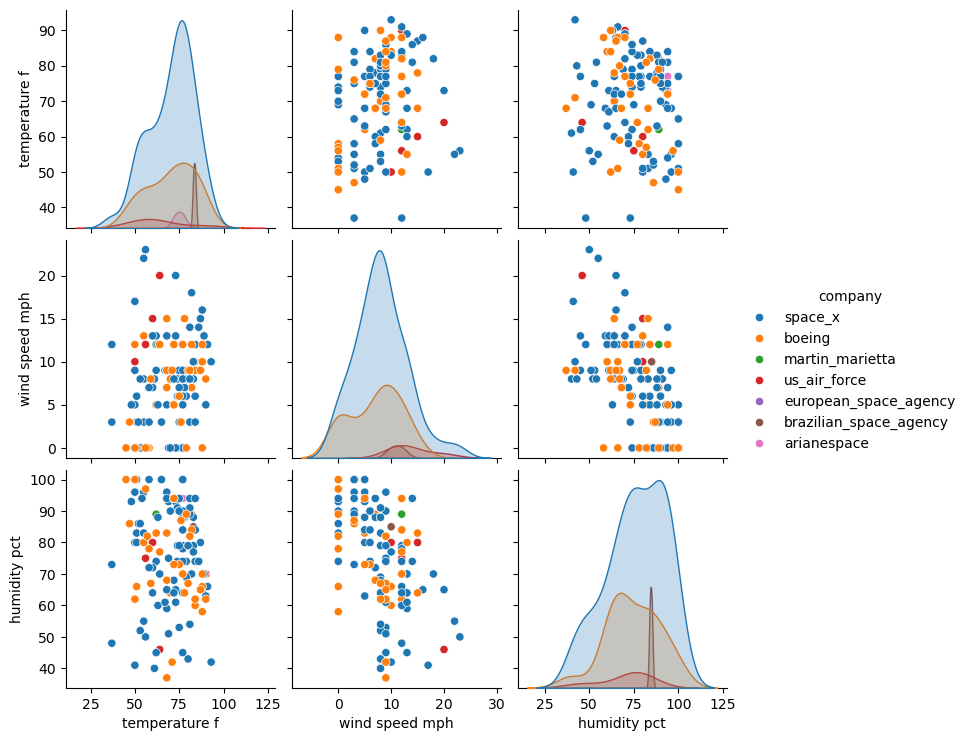

In [641]:
sns.pairplot(data=df_space[['temperature f','wind speed mph','humidity pct','company']],hue='company')

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


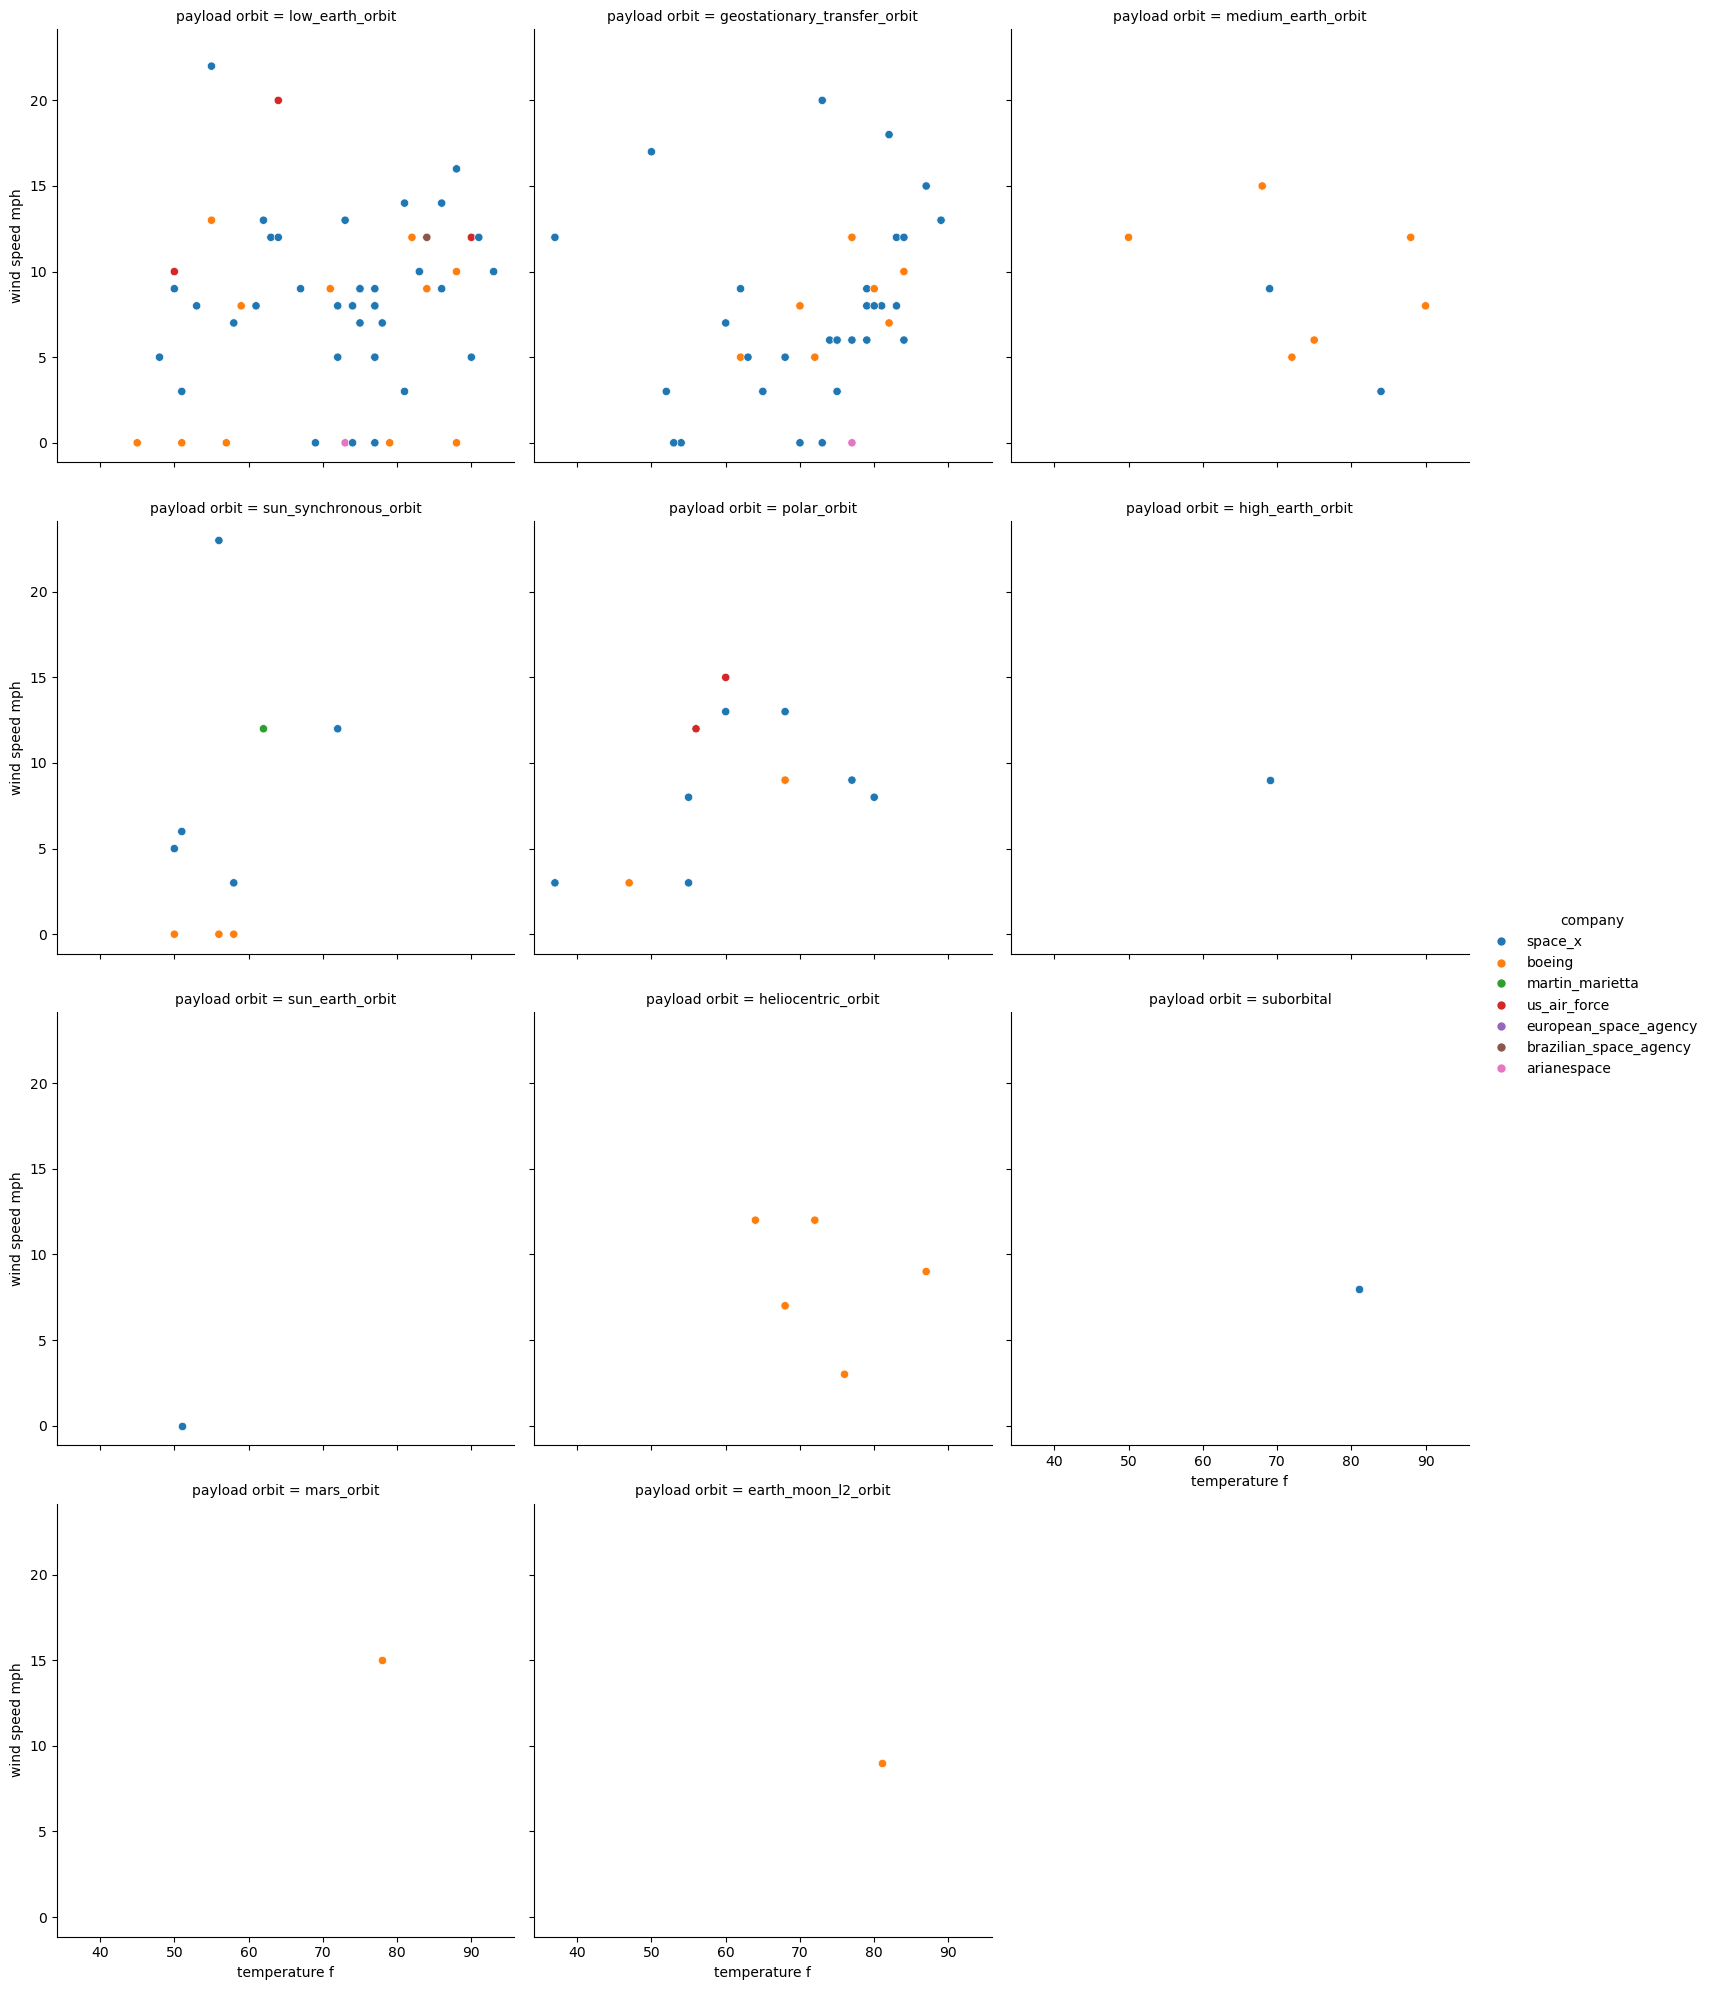

In [642]:
sns.relplot(data=df_space,x='temperature f',y='wind speed mph',hue='company',col='payload orbit',col_wrap=3)

In [643]:
# Data Imputation - Handling outliers

In [644]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              150 non-null    object 
 1   temperature f        136 non-null    float64
 2   wind speed mph       136 non-null    float64
 3   humidity pct         136 non-null    float64
 4   vehicle type         150 non-null    object 
 5   liftoff thrust kn    150 non-null    int64  
 6   payload to orbit kg  150 non-null    int64  
 7   rocket height m      150 non-null    float64
 8   fairing diameter m   146 non-null    float64
 9   payload mass kg      131 non-null    float64
 10  payload orbit        150 non-null    object 
 11  mission status       150 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 14.2+ KB


In [645]:
df_space.nunique()

company                 7
temperature f          45
wind speed mph         18
humidity pct           50
vehicle type            6
liftoff thrust kn      23
payload to orbit kg    32
rocket height m        18
fairing diameter m     10
payload mass kg        99
payload orbit          11
mission status          2
dtype: int64

In [646]:
#Find and drop duplicates

In [647]:
df_space[df_space.duplicated()]

company  temperature f  wind speed mph  humidity pct vehicle type  \
2   space_x            NaN             NaN           NaN       falcon   
4   space_x            NaN             NaN           NaN       falcon   
48  space_x           65.0             3.0         100.0       falcon   
58  space_x           89.0            13.0          70.0       falcon   

    liftoff thrust kn  payload to orbit kg  rocket height m  \
2                 343                  470            22.25   
4                 343                  470            22.25   
48               5885                13150            68.40   
58               6804                 8300            70.00   

    fairing diameter m  payload mass kg                 payload orbit  \
2                  1.5              NaN               low_earth_orbit   
4                  1.5              NaN               low_earth_orbit   
48                 5.2           4159.0  geostationary_transfer_orbit   
58                 5.2           3600.0  geostationary_transfer_orbit   

   mission status  
2         failure  
4         failure  
48        success  
58        success

In [648]:
df_space.drop_duplicates(ignore_index=True)

company  temperature f  wind speed mph  humidity pct vehicle type  \
0    space_x           86.0             9.0          74.0       falcon   
1    space_x            NaN             NaN           NaN       falcon   
2    space_x            NaN             NaN           NaN       falcon   
3    space_x           77.0             5.0         100.0       falcon   
4    space_x           93.0            10.0          42.0       falcon   
..       ...            ...             ...           ...          ...   
141   boeing           51.0             0.0          66.0        delta   
142   boeing           59.0             8.0          67.0        delta   
143   boeing           76.0             3.0          87.0        delta   
144   boeing           72.0             5.0          73.0        delta   
145   boeing           50.0             0.0         100.0        delta   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
0                  343                  470            22.25   
1                  343                  470            22.25   
2                  343                  470            22.25   
3                 4940                10450            54.90   
4                 5885                13150            68.40   
..                 ...                  ...              ...   
141               3511                 4800            38.90   
142               3511                 4800            38.90   
143               3020                 1110            38.10   
144               4895                 6390            62.50   
145               2533                 2703            38.90   

     fairing diameter m  payload mass kg                 payload orbit  \
0                   1.5             19.5               low_earth_orbit   
1                   1.5              NaN               low_earth_orbit   
2                   1.5              8.0               low_earth_orbit   
3                   5.2            150.0               low_earth_orbit   
4                   5.2           1952.0               low_earth_orbit   
..                  ...              ...                           ...   
141                 3.0            689.0               low_earth_orbit   
142                 3.0           3117.0               low_earth_orbit   
143                 2.9            328.0            heliocentric_orbit   
144                 4.0           3170.0  geostationary_transfer_orbit   
145                 3.0            970.0         sun_synchronous_orbit   

    mission status  
0          failure  
1          failure  
2          failure  
3          failure  
4          failure  
..             ...  
141        success  
142        success  
143        success  
144        success  
145        success  

[146 rows x 12 columns]

In [649]:
df_space['mission status'].value_counts()

mission status
success    120
failure     30
Name: count, dtype: int64

In [650]:
df_space.isna()

company  temperature f  wind speed mph  humidity pct  vehicle type  \
0      False          False           False         False         False   
1      False           True            True          True         False   
2      False           True            True          True         False   
3      False           True            True          True         False   
4      False           True            True          True         False   
..       ...            ...             ...           ...           ...   
145    False          False           False         False         False   
146    False          False           False         False         False   
147    False          False           False         False         False   
148    False          False           False         False         False   
149    False          False           False         False         False   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
0                False                False            False   
1                False                False            False   
2                False                False            False   
3                False                False            False   
4                False                False            False   
..                 ...                  ...              ...   
145              False                False            False   
146              False                False            False   
147              False                False            False   
148              False                False            False   
149              False                False            False   

     fairing diameter m  payload mass kg  payload orbit  mission status  
0                 False            False          False           False  
1                 False             True          False           False  
2                 False             True          False           False  
3                 False            False          False           False  
4                 False             True          False           False  
..                  ...              ...            ...             ...  
145               False            False          False           False  
146               False            False          False           False  
147               False            False          False           False  
148               False            False          False           False  
149               False            False          False           False  

[150 rows x 12 columns]

In [651]:
df_space.isna().sum()

company                 0
temperature f          14
wind speed mph         14
humidity pct           14
vehicle type            0
liftoff thrust kn       0
payload to orbit kg     0
rocket height m         0
fairing diameter m      4
payload mass kg        19
payload orbit           0
mission status          0
dtype: int64

In [652]:
num_missing = df_space.isna().sum(axis=1)

In [653]:
((num_missing)>0).sum()

27

In [654]:
df_space[num_missing>0]

company  temperature f  wind speed mph  humidity pct  \
1                   space_x            NaN             NaN           NaN   
2                   space_x            NaN             NaN           NaN   
3                   space_x            NaN             NaN           NaN   
4                   space_x            NaN             NaN           NaN   
11                   boeing           70.0             8.0          64.0   
12                   boeing           62.0             5.0          83.0   
14             us_air_force           90.0            12.0          70.0   
19             us_air_force            NaN             NaN           NaN   
20             us_air_force            NaN             NaN           NaN   
21    european_space_agency            NaN             NaN           NaN   
22    european_space_agency            NaN             NaN           NaN   
23   brazilian_space_agency            NaN             NaN           NaN   
28              arianespace            NaN             NaN           NaN   
29              arianespace            NaN             NaN           NaN   
30                  space_x            NaN             NaN           NaN   
31                  space_x            NaN             NaN           NaN   
32                  space_x           78.0             7.0          88.0   
33                  space_x           61.0             8.0          40.0   
34                  space_x           74.0             0.0          74.0   
41                  space_x           88.0            16.0          65.0   
51                  space_x           74.0             8.0          91.0   
65                  space_x           81.0            14.0          94.0   
79                  space_x           64.0            12.0          70.0   
107                 space_x           84.0             3.0          94.0   
118                  boeing           55.0            13.0          80.0   
119                  boeing           77.0            12.0          70.0   
135                  boeing            NaN             NaN           NaN   

    vehicle type  liftoff thrust kn  payload to orbit kg  rocket height m  \
1         falcon                343                  470            22.25   
2         falcon                343                  470            22.25   
3         falcon                343                  470            22.25   
4         falcon                343                  470            22.25   
11         delta                628                 3810            35.00   
12         delta               9411                28370            72.00   
14         titan              13642                13100            42.00   
19         titan              13642                13100            42.00   
20         titan               1936                 3100            42.00   
21        ariane               2772                 1850            50.00   
22        ariane               2772                 1850            50.00   
23           vls                623                  380            19.00   
28        ariane              11400                 6900            52.00   
29        ariane               4334                 2930            58.72   
30        falcon                343                  470            22.25   
31        falcon                343                  470            22.25   
32        falcon               4940                10450            54.90   
33        falcon               4940                10450            54.90   
34        falcon               4940                10450            54.90   
41        falcon               5885                13150            68.40   
51        falcon               6804                22800            70.00   
65        falcon               6804                22800            70.00   
79        falcon               6804                22800            70.00   
107       falcon              22819        

In [655]:
#Get the numerical and categorical columns separately for imputation

In [656]:
df_space_numeric = df_space.select_dtypes(include='number')

In [657]:
numeric_cols = df_space_numeric.columns

In [658]:
numeric_cols

Index(['temperature f', 'wind speed mph', 'humidity pct', 'liftoff thrust kn',
       'payload to orbit kg', 'rocket height m', 'fairing diameter m',
       'payload mass kg'],
      dtype='object')

In [659]:
#Categorical columns

In [660]:
df_space_categorical_columns = df_space.select_dtypes(exclude='number').columns

In [661]:
cat_cols = df_space_categorical_columns

In [662]:
cat_cols

Index(['company', 'vehicle type', 'payload orbit', 'mission status'], dtype='object')

In [663]:
#Imputation with simpleImputer

In [664]:
from sklearn.impute import SimpleImputer

In [665]:
simple_imputer_mean = SimpleImputer(strategy='mean')

In [666]:
imputed_num = simple_imputer_mean.fit_transform(df_space[numeric_cols])

In [667]:
imputed_num.shape

(150, 8)

In [668]:
df_space[numeric_cols].shape

(150, 8)

In [669]:
df_space[numeric_cols] = imputed_num

In [670]:
df_space[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature f        150 non-null    float64
 1   wind speed mph       150 non-null    float64
 2   humidity pct         150 non-null    float64
 3   liftoff thrust kn    150 non-null    float64
 4   payload to orbit kg  150 non-null    float64
 5   rocket height m      150 non-null    float64
 6   fairing diameter m   150 non-null    float64
 7   payload mass kg      150 non-null    float64
dtypes: float64(8)
memory usage: 9.5 KB


In [671]:
# Imputation for categorical columns

In [672]:
simple_imp_freq = SimpleImputer(strategy='most_frequent')

In [673]:
imputed_cat = simple_imp_freq.fit_transform(df_space[cat_cols])

In [674]:
df_space[cat_cols] = imputed_cat

In [675]:
df_space[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company         150 non-null    object
 1   vehicle type    150 non-null    object
 2   payload orbit   150 non-null    object
 3   mission status  150 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB


In [676]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              150 non-null    object 
 1   temperature f        150 non-null    float64
 2   wind speed mph       150 non-null    float64
 3   humidity pct         150 non-null    float64
 4   vehicle type         150 non-null    object 
 5   liftoff thrust kn    150 non-null    float64
 6   payload to orbit kg  150 non-null    float64
 7   rocket height m      150 non-null    float64
 8   fairing diameter m   150 non-null    float64
 9   payload mass kg      150 non-null    float64
 10  payload orbit        150 non-null    object 
 11  mission status       150 non-null    object 
dtypes: float64(8), object(4)
memory usage: 14.2+ KB


In [677]:
df_space[num_missing>0]

company  temperature f  wind speed mph  humidity pct  \
1                   space_x      70.441176        8.007353     76.066176   
2                   space_x      70.441176        8.007353     76.066176   
3                   space_x      70.441176        8.007353     76.066176   
4                   space_x      70.441176        8.007353     76.066176   
11                   boeing      70.000000        8.000000     64.000000   
12                   boeing      62.000000        5.000000     83.000000   
14             us_air_force      90.000000       12.000000     70.000000   
19             us_air_force      70.441176        8.007353     76.066176   
20             us_air_force      70.441176        8.007353     76.066176   
21    european_space_agency      70.441176        8.007353     76.066176   
22    european_space_agency      70.441176        8.007353     76.066176   
23   brazilian_space_agency      70.441176        8.007353     76.066176   
28              arianespace      70.441176        8.007353     76.066176   
29              arianespace      70.441176        8.007353     76.066176   
30                  space_x      70.441176        8.007353     76.066176   
31                  space_x      70.441176        8.007353     76.066176   
32                  space_x      78.000000        7.000000     88.000000   
33                  space_x      61.000000        8.000000     40.000000   
34                  space_x      74.000000        0.000000     74.000000   
41                  space_x      88.000000       16.000000     65.000000   
51                  space_x      74.000000        8.000000     91.000000   
65                  space_x      81.000000       14.000000     94.000000   
79                  space_x      64.000000       12.000000     70.000000   
107                 space_x      84.000000        3.000000     94.000000   
118                  boeing      55.000000       13.000000     80.000000   
119                  boeing      77.000000       12.000000     70.000000   
135                  boeing      70.441176        8.007353     76.066176   

    vehicle type  liftoff thrust kn  payload to orbit kg  rocket height m  \
1         falcon              343.0                470.0            22.25   
2         falcon              343.0                470.0            22.25   
3         falcon              343.0                470.0            22.25   
4         falcon              343.0                470.0            22.25   
11         delta              628.0               3810.0            35.00   
12         delta             9411.0              28370.0            72.00   
14         titan            13642.0              13100.0            42.00   
19         titan            13642.0              13100.0            42.00   
20         titan             1936.0               3100.0            42.00   
21        ariane             2772.0               1850.0            50.00   
22        ariane             2772.0               1850.0            50.00   
23           vls              623.0                380.0            19.00   
28        ariane            11400.0               6900.0            52.00   
29        ariane             4334.0               2930.0            58.72   
30        falcon              343.0                470.0            22.25   
31        falcon              343.0                470.0            22.25   
32        falcon             4940.0              10450.0            54.90   
33        falcon             4940.0              10450.0            54.90   
34        falcon             4940.0              10450.0            54.90   
41        falcon             5885.0              13150.0            68.40   
51        falcon             6804.0              22800.0            70.00   
65        falcon             6804.0              22800.0            70.00   
79        falcon             6804.0              22800.0            70.00   
107       falcon            22819.0        

In [678]:
#Handling outliers

In [679]:
df_space.describe().T #min,25%,50%,75%,max - These are five number statistics

count          mean          std    min      25%  \
temperature f        150.0     70.441176    12.089579   37.0    62.00   
wind speed mph       150.0      8.007353     4.729596    0.0     5.00   
humidity pct         150.0     76.066176    14.951915   37.0    66.25   
liftoff thrust kn    150.0   5668.360000  3619.496024  343.0  3511.00   
payload to orbit kg  150.0  10708.913333  9502.621246  380.0  3099.00   
rocket height m      150.0     56.337133    16.577740   19.0    38.90   
fairing diameter m   150.0      4.252329     1.291181    1.0     3.00   
payload mass kg      150.0   3495.767176  3167.950244    0.0  1222.75   

                             50%      75%      max  
temperature f          72.000000     79.0     93.0  
wind speed mph          8.007353     12.0     23.0  
humidity pct           76.066176     88.0    100.0  
liftoff thrust kn    5885.000000   6804.0  22819.0  
payload to orbit kg  8300.000000  22800.0  63800.0  
rocket height m        68.400000     70.0     72.0  
fairing diameter m      5.200000      5.2      5.4  
payload mass kg      3000.000000   4318.5  15600.0

array([[<Axes: title={'center': 'temperature f'}>,
        <Axes: title={'center': 'wind speed mph'}>,
        <Axes: title={'center': 'humidity pct'}>],
       [<Axes: title={'center': 'liftoff thrust kn'}>,
        <Axes: title={'center': 'payload to orbit kg'}>,
        <Axes: title={'center': 'rocket height m'}>],
       [<Axes: title={'center': 'fairing diameter m'}>,
        <Axes: title={'center': 'payload mass kg'}>, <Axes: >]],
      dtype=object)

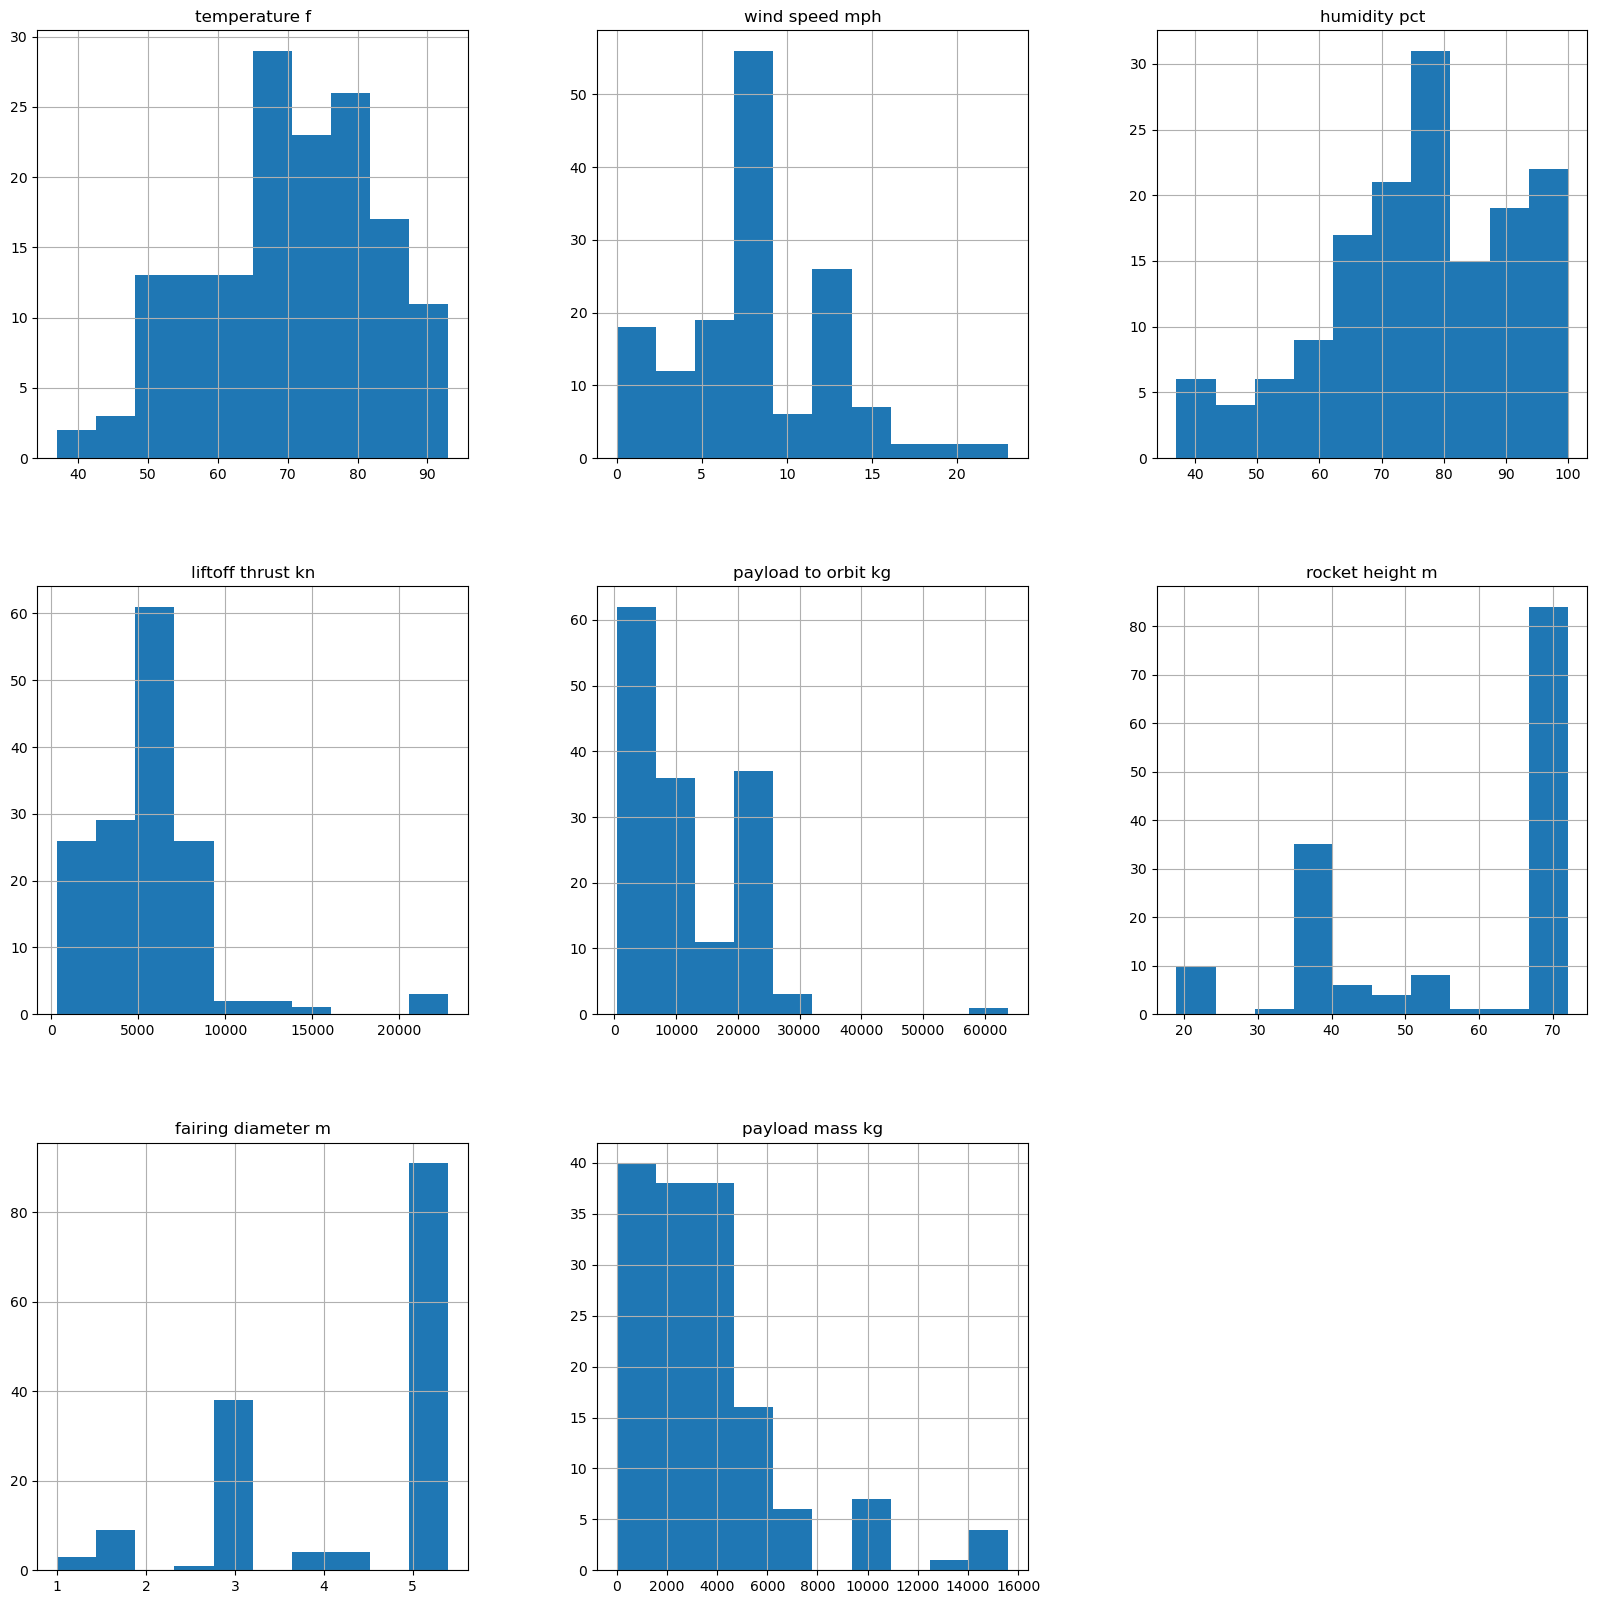

In [680]:
df_space.hist(figsize=(20,20))
#x-axis shows the bin and inter rows of population
#y-axis shows the count of values that falls each bin in rows

<Axes: >

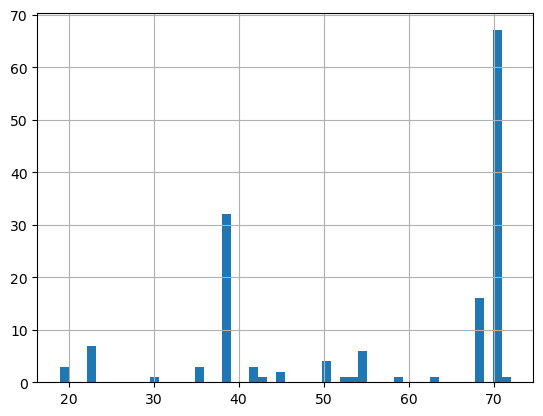

In [681]:
df_space['rocket height m'].hist(bins=50)

<Axes: >

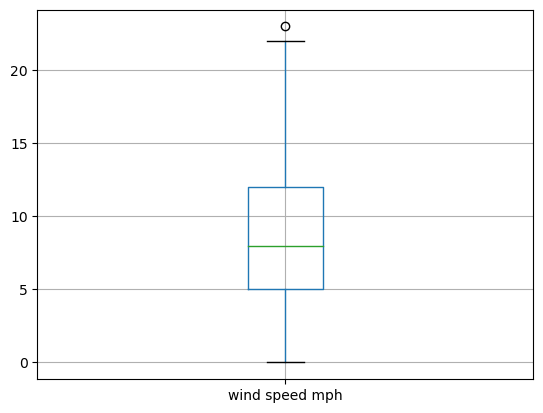

In [682]:
df_space.boxplot('wind speed mph')

In [683]:
Q1 = df_space['wind speed mph'].quantile(0.25)
Q3 = df_space['wind speed mph'].quantile(0.75)

In [684]:
print(Q1)
print(Q3)

5.0
12.0


In [685]:
df_space['wind speed mph'].describe()

count    150.000000
mean       8.007353
std        4.729596
min        0.000000
25%        5.000000
50%        8.007353
75%       12.000000
max       23.000000
Name: wind speed mph, dtype: float64

In [686]:
IQR = Q3 - Q1

In [687]:
print(IQR)

7.0


In [688]:
outlier_high = Q3 + 1.5 * IQR
outlier_low = Q1 - 1.5 * IQR

In [689]:
print(outlier_high)
print(outlier_low)

22.5
-5.5


In [690]:
#Removing outlier

In [691]:
ol = (df_space['wind speed mph'] < outlier_low) | (df_space['wind speed mph'] > outlier_high)

In [692]:
df_space[ol]

company  temperature f  wind speed mph  humidity pct vehicle type  \
82  space_x           56.0            23.0          50.0       falcon   

    liftoff thrust kn  payload to orbit kg  rocket height m  \
82             6804.0              22800.0             70.0   

    fairing diameter m  payload mass kg          payload orbit mission status  
82                 5.2           2141.0  sun_synchronous_orbit        success

<Axes: >

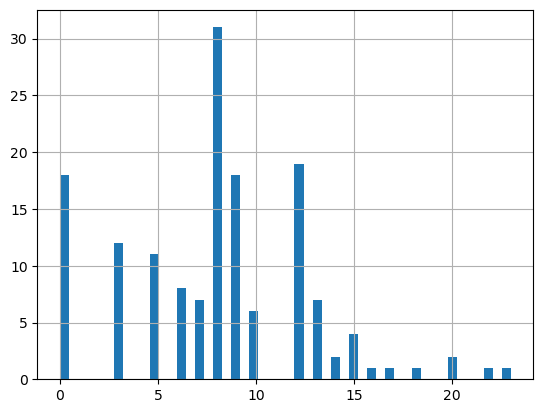

In [693]:
df_space['wind speed mph'].hist(bins=50)

In [694]:
Q99 = df_space['wind speed mph'].quantile(0.99) #Values above 99 percentile. Highest 1% of data

In [695]:
Q99

21.019999999999982

In [696]:
df_space.loc[df_space['wind speed mph'] > Q99] #Capping with 99 percentage

company  temperature f  wind speed mph  humidity pct vehicle type  \
82   space_x           56.0            23.0          50.0       falcon   
117  space_x           55.0            22.0          55.0       falcon   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
82              6804.0              22800.0             70.0   
117             7607.0              22800.0             70.0   

     fairing diameter m  payload mass kg          payload orbit mission status  
82                  5.2           2141.0  sun_synchronous_orbit        success  
117                 5.2           2500.0        low_earth_orbit        success

In [697]:
df_space.loc[df_space['wind speed mph'] > Q99, 'wind speed mph'] = Q99

<Axes: >

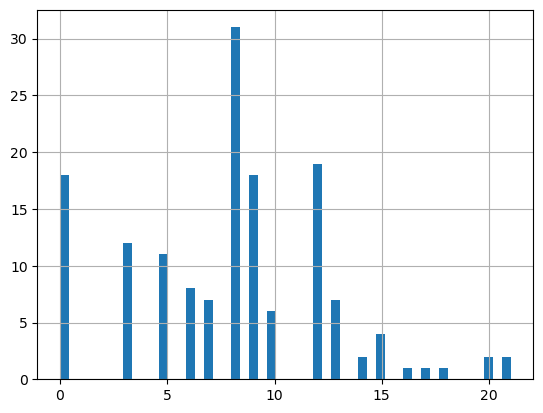

In [698]:
df_space['wind speed mph'].hist(bins=50)

<Axes: >

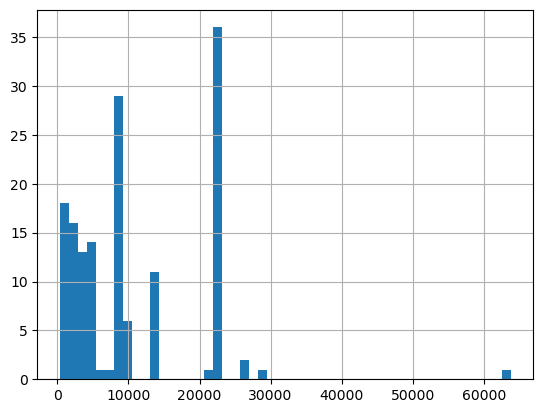

In [699]:
df_space['payload to orbit kg'].hist(bins=50)

In [700]:
df_space[df_space['payload to orbit kg'] >= 30000 ]

company  temperature f  wind speed mph  humidity pct vehicle type  \
81  space_x           68.0             7.0          94.0       falcon   

    liftoff thrust kn  payload to orbit kg  rocket height m  \
81            22819.0              63800.0             70.0   

    fairing diameter m  payload mass kg       payload orbit mission status  
81                 5.2           1300.0  heliocentric_orbit        success

In [701]:
df_space

company  temperature f  wind speed mph  humidity pct vehicle type  \
0    space_x      86.000000        9.000000     74.000000       falcon   
1    space_x      70.441176        8.007353     76.066176       falcon   
2    space_x      70.441176        8.007353     76.066176       falcon   
3    space_x      70.441176        8.007353     76.066176       falcon   
4    space_x      70.441176        8.007353     76.066176       falcon   
..       ...            ...             ...           ...          ...   
145   boeing      51.000000        0.000000     66.000000        delta   
146   boeing      59.000000        8.000000     67.000000        delta   
147   boeing      76.000000        3.000000     87.000000        delta   
148   boeing      72.000000        5.000000     73.000000        delta   
149   boeing      50.000000        0.000000    100.000000        delta   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
0                343.0                470.0            22.25   
1                343.0                470.0            22.25   
2                343.0                470.0            22.25   
3                343.0                470.0            22.25   
4                343.0                470.0            22.25   
..                 ...                  ...              ...   
145             3511.0               4800.0            38.90   
146             3511.0               4800.0            38.90   
147             3020.0               1110.0            38.10   
148             4895.0               6390.0            62.50   
149             2533.0               2703.0            38.90   

     fairing diameter m  payload mass kg                 payload orbit  \
0                   1.5        19.500000               low_earth_orbit   
1                   1.5      3495.767176               low_earth_orbit   
2                   1.5      3495.767176               low_earth_orbit   
3                   1.5         8.000000               low_earth_orbit   
4                   1.5      3495.767176               low_earth_orbit   
..                  ...              ...                           ...   
145                 3.0       689.000000               low_earth_orbit   
146                 3.0      3117.000000               low_earth_orbit   
147                 2.9       328.000000            heliocentric_orbit   
148                 4.0      3170.000000  geostationary_transfer_orbit   
149                 3.0       970.000000         sun_synchronous_orbit   

    mission status  
0          failure  
1          failure  
2          failure  
3          failure  
4          failure  
..             ...  
145        success  
146        success  
147        success  
148        success  
149        success  

[150 rows x 12 columns]

In [702]:
#Feature Extraction
#vectorization - Converting non-numeric features to numeric 
#All ML is magic algebra underneath.
#Multiple numbers for each variable - Vector

In [703]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              150 non-null    object 
 1   temperature f        150 non-null    float64
 2   wind speed mph       150 non-null    float64
 3   humidity pct         150 non-null    float64
 4   vehicle type         150 non-null    object 
 5   liftoff thrust kn    150 non-null    float64
 6   payload to orbit kg  150 non-null    float64
 7   rocket height m      150 non-null    float64
 8   fairing diameter m   150 non-null    float64
 9   payload mass kg      150 non-null    float64
 10  payload orbit        150 non-null    object 
 11  mission status       150 non-null    object 
dtypes: float64(8), object(4)
memory usage: 14.2+ KB


In [704]:
df_space['company'].value_counts()

company
space_x                   96
boeing                    37
us_air_force               7
arianespace                4
brazilian_space_agency     3
european_space_agency      2
martin_marietta            1
Name: count, dtype: int64

In [705]:
df_space['vehicle type'].value_counts()

vehicle type
falcon    96
delta     37
titan      8
ariane     5
vls        3
vega       1
Name: count, dtype: int64

In [706]:
df_space['payload orbit'].value_counts()

payload orbit
low_earth_orbit                 63
geostationary_transfer_orbit    45
polar_orbit                     12
medium_earth_orbit               9
sun_synchronous_orbit            9
heliocentric_orbit               6
high_earth_orbit                 2
sun_earth_orbit                  1
suborbital                       1
mars_orbit                       1
earth_moon_l2_orbit              1
Name: count, dtype: int64

In [707]:
df_space['mission status'].value_counts()

mission status
success    120
failure     30
Name: count, dtype: int64

In [708]:
df_space = df_space.astype({'company':'category','vehicle type':'category','payload orbit':'category','mission status':'category'})

In [709]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   company              150 non-null    category
 1   temperature f        150 non-null    float64 
 2   wind speed mph       150 non-null    float64 
 3   humidity pct         150 non-null    float64 
 4   vehicle type         150 non-null    category
 5   liftoff thrust kn    150 non-null    float64 
 6   payload to orbit kg  150 non-null    float64 
 7   rocket height m      150 non-null    float64 
 8   fairing diameter m   150 non-null    float64 
 9   payload mass kg      150 non-null    float64 
 10  payload orbit        150 non-null    category
 11  mission status       150 non-null    category
dtypes: category(4), float64(8)
memory usage: 11.2 KB


In [710]:
categorical = ['company', 'vehicle type', 'payload orbit', 'mission status']

In [711]:
#Make a copy of dataset. To preserve it as well
x = df_space.copy()

In [712]:
#Iterate over categorical and convert each categorical into equivalent numeric codes by using .cat.code

In [713]:
for c in categorical:
    x[c] = x[c].cat.codes

In [714]:
x

company  temperature f  wind speed mph  humidity pct  vehicle type  \
0          5      86.000000        9.000000     74.000000             2   
1          5      70.441176        8.007353     76.066176             2   
2          5      70.441176        8.007353     76.066176             2   
3          5      70.441176        8.007353     76.066176             2   
4          5      70.441176        8.007353     76.066176             2   
..       ...            ...             ...           ...           ...   
145        1      51.000000        0.000000     66.000000             1   
146        1      59.000000        8.000000     67.000000             1   
147        1      76.000000        3.000000     87.000000             1   
148        1      72.000000        5.000000     73.000000             1   
149        1      50.000000        0.000000    100.000000             1   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
0                343.0                470.0            22.25   
1                343.0                470.0            22.25   
2                343.0                470.0            22.25   
3                343.0                470.0            22.25   
4                343.0                470.0            22.25   
..                 ...                  ...              ...   
145             3511.0               4800.0            38.90   
146             3511.0               4800.0            38.90   
147             3020.0               1110.0            38.10   
148             4895.0               6390.0            62.50   
149             2533.0               2703.0            38.90   

     fairing diameter m  payload mass kg  payload orbit  mission status  
0                   1.5        19.500000              4               0  
1                   1.5      3495.767176              4               0  
2                   1.5      3495.767176              4               0  
3                   1.5         8.000000              4               0  
4                   1.5      3495.767176              4               0  
..                  ...              ...            ...             ...  
145                 3.0       689.000000              4               1  
146                 3.0      3117.000000              4               1  
147                 2.9       328.000000              2               1  
148                 4.0      3170.000000              1               1  
149                 3.0       970.000000             10               1  

[150 rows x 12 columns]

In [715]:
#Problem 
#Value indicates weights
#This goes down in prediction accuracy
#Solution
#Use code does not indicate weight

In [716]:
#One hot encoding
#History - Digital circuits
#Exactly one of nultiple wires 'hot' at a given time

In [717]:
#One hot encoding

In [718]:
from sklearn.preprocessing import OneHotEncoder
#Creates sparse matrix array values
onehot = OneHotEncoder(drop='first')
data=[['Male',1],['Female',3],['Female',2]]
onehot.fit_transform(data).toarray()
onehot.get_feature_names_out(['gender','group'])
#Problem
#We need to indicate what are the actual feature names
#Sometimes numeric data in nupu as well.which it will not skip.It will convert that as well

array(['gender_Male', 'group_2', 'group_3'], dtype=object)

In [719]:
#DictVectorizer
#Input will be the dictionary

In [720]:
from sklearn.feature_extraction import DictVectorizer

In [721]:
measurements = [
    {'city':'Dubai', 'temperature':33.},
    {'city':'London', 'temperature':-5.},
    {'city':'Canada', 'temperature':-20.},
]

In [722]:
dv = DictVectorizer()
dv.fit_transform(measurements).toarray()

array([[  0.,   1.,   0.,  33.],
       [  0.,   0.,   1.,  -5.],
       [  1.,   0.,   0., -20.]])

In [723]:
dv.get_feature_names_out()

array(['city=Canada', 'city=Dubai', 'city=London', 'temperature'],
      dtype=object)

In [724]:
df_space_dict = x.to_dict(orient='records')

In [725]:
df_space_dict

[{'company': 5,
  'temperature f': 86.0,
  'wind speed mph': 9.0,
  'humidity pct': 74.0,
  'vehicle type': 2,
  'liftoff thrust kn': 343.0,
  'payload to orbit kg': 470.0,
  'rocket height m': 22.25,
  'fairing diameter m': 1.5,
  'payload mass kg': 19.5,
  'payload orbit': 4,
  'mission status': 0},
 {'company': 5,
  'temperature f': 70.44117647058823,
  'wind speed mph': 8.007352941176471,
  'humidity pct': 76.06617647058823,
  'vehicle type': 2,
  'liftoff thrust kn': 343.0,
  'payload to orbit kg': 470.0,
  'rocket height m': 22.25,
  'fairing diameter m': 1.5,
  'payload mass kg': 3495.767175572519,
  'payload orbit': 4,
  'mission status': 0},
 {'company': 5,
  'temperature f': 70.44117647058823,
  'wind speed mph': 8.007352941176471,
  'humidity pct': 76.06617647058823,
  'vehicle type': 2,
  'liftoff thrust kn': 343.0,
  'payload to orbit kg': 470.0,
  'rocket height m': 22.25,
  'fairing diameter m': 1.5,
  'payload mass kg': 3495.767175572519,
  'payload orbit': 4,
  'missio

In [726]:
df_space_vect = dv.fit_transform(df_space_dict).toarray()

In [727]:
dv.get_feature_names_out()

array(['company', 'fairing diameter m', 'humidity pct',
       'liftoff thrust kn', 'mission status', 'payload mass kg',
       'payload orbit', 'payload to orbit kg', 'rocket height m',
       'temperature f', 'vehicle type', 'wind speed mph'], dtype=object)

In [728]:
df_space_vect

array([[  5.        ,   1.5       ,  74.        , ...,  86.        ,
          2.        ,   9.        ],
       [  5.        ,   1.5       ,  76.06617647, ...,  70.44117647,
          2.        ,   8.00735294],
       [  5.        ,   1.5       ,  76.06617647, ...,  70.44117647,
          2.        ,   8.00735294],
       ...,
       [  1.        ,   2.9       ,  87.        , ...,  76.        ,
          1.        ,   3.        ],
       [  1.        ,   4.        ,  73.        , ...,  72.        ,
          1.        ,   5.        ],
       [  1.        ,   3.        , 100.        , ...,  50.        ,
          1.        ,   0.        ]])

In [729]:
#Pandas get dummies

In [730]:
X = pd.get_dummies(df_space, drop_first=True)

In [731]:
X

temperature f  wind speed mph  humidity pct  liftoff thrust kn  \
0        86.000000        9.000000     74.000000              343.0   
1        70.441176        8.007353     76.066176              343.0   
2        70.441176        8.007353     76.066176              343.0   
3        70.441176        8.007353     76.066176              343.0   
4        70.441176        8.007353     76.066176              343.0   
..             ...             ...           ...                ...   
145      51.000000        0.000000     66.000000             3511.0   
146      59.000000        8.000000     67.000000             3511.0   
147      76.000000        3.000000     87.000000             3020.0   
148      72.000000        5.000000     73.000000             4895.0   
149      50.000000        0.000000    100.000000             2533.0   

     payload to orbit kg  rocket height m  fairing diameter m  \
0                  470.0            22.25                 1.5   
1                  470.0            22.25                 1.5   
2                  470.0            22.25                 1.5   
3                  470.0            22.25                 1.5   
4                  470.0            22.25                 1.5   
..                   ...              ...                 ...   
145               4800.0            38.90                 3.0   
146               4800.0            38.90                 3.0   
147               1110.0            38.10                 2.9   
148               6390.0            62.50                 4.0   
149               2703.0            38.90                 3.0   

     payload mass kg  company_boeing  company_brazilian_space_agency  ...  \
0          19.500000           False                           False  ...   
1        3495.767176           False                           False  ...   
2        3495.767176           False                           False  ...   
3           8.000000           False                           False  ...   
4        3495.767176           False                           False  ...   
..               ...             ...                             ...  ...   
145       689.000000            True                           False  ...   
146      3117.000000            True                           False  ...   
147       328.000000            True                           False  ...   
148      3170.000000            True                           False  ...   
149       970.000000            True                           False  ...   

     payload orbit_heliocentric_orbit  payload orbit_high_earth_orbit  \
0                               False                           False   
1                               False                           False   
2                               False                           False   
3                               False                           False   
4                               False                           False   
..                                ...                             ...   
145                             False                           False   
146                             False                           False   
147                              True                           False   
148                             False                           False   
149                             False                           False   

     payload orbit_low_earth_orbit  payload orbit_mars_orbit  \
0                             True                     False   
1                             True                     False   
2                             True                     False   
3                             True                     False   
4                             True                     False   
..                             ...                       ...   
145                           True                     False   
146                           True                     Fa

In [732]:
#Label Encoder
#Needed for classification task
#Regression labels are numeric
#Clustering have no lables

In [733]:
#Why not use feature vectorizers
#Features are n-dimensional and labels are 1- dimensional
#Labels usually don't need one hot encoding
#Label encoding result usually 1-dimensional, and sometimes n-dimensional
#Note: In practice, mostly custom mappings are used 

In [734]:
from sklearn.preprocessing import LabelEncoder

In [735]:
le = LabelEncoder()

In [736]:
le.fit_transform(list('abcbacaad'))

array([0, 1, 2, 1, 0, 2, 0, 0, 3])

In [737]:
le.classes_ #Any array of data can be captured

array(['a', 'b', 'c', 'd'], dtype='<U1')

In [738]:
#Label Binarizer
#Converts the value into binary values

In [739]:
from sklearn.preprocessing import LabelBinarizer

In [740]:
lb = LabelBinarizer()
lb.fit_transform(list('abcbacaad'))

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [741]:
lb.classes_

array(['a', 'b', 'c', 'd'], dtype='<U1')

In [742]:
df_space

company  temperature f  wind speed mph  humidity pct vehicle type  \
0    space_x      86.000000        9.000000     74.000000       falcon   
1    space_x      70.441176        8.007353     76.066176       falcon   
2    space_x      70.441176        8.007353     76.066176       falcon   
3    space_x      70.441176        8.007353     76.066176       falcon   
4    space_x      70.441176        8.007353     76.066176       falcon   
..       ...            ...             ...           ...          ...   
145   boeing      51.000000        0.000000     66.000000        delta   
146   boeing      59.000000        8.000000     67.000000        delta   
147   boeing      76.000000        3.000000     87.000000        delta   
148   boeing      72.000000        5.000000     73.000000        delta   
149   boeing      50.000000        0.000000    100.000000        delta   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
0                343.0                470.0            22.25   
1                343.0                470.0            22.25   
2                343.0                470.0            22.25   
3                343.0                470.0            22.25   
4                343.0                470.0            22.25   
..                 ...                  ...              ...   
145             3511.0               4800.0            38.90   
146             3511.0               4800.0            38.90   
147             3020.0               1110.0            38.10   
148             4895.0               6390.0            62.50   
149             2533.0               2703.0            38.90   

     fairing diameter m  payload mass kg                 payload orbit  \
0                   1.5        19.500000               low_earth_orbit   
1                   1.5      3495.767176               low_earth_orbit   
2                   1.5      3495.767176               low_earth_orbit   
3                   1.5         8.000000               low_earth_orbit   
4                   1.5      3495.767176               low_earth_orbit   
..                  ...              ...                           ...   
145                 3.0       689.000000               low_earth_orbit   
146                 3.0      3117.000000               low_earth_orbit   
147                 2.9       328.000000            heliocentric_orbit   
148                 4.0      3170.000000  geostationary_transfer_orbit   
149                 3.0       970.000000         sun_synchronous_orbit   

    mission status  
0          failure  
1          failure  
2          failure  
3          failure  
4          failure  
..             ...  
145        success  
146        success  
147        success  
148        success  
149        success  

[150 rows x 12 columns]

In [743]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   company              150 non-null    category
 1   temperature f        150 non-null    float64 
 2   wind speed mph       150 non-null    float64 
 3   humidity pct         150 non-null    float64 
 4   vehicle type         150 non-null    category
 5   liftoff thrust kn    150 non-null    float64 
 6   payload to orbit kg  150 non-null    float64 
 7   rocket height m      150 non-null    float64 
 8   fairing diameter m   150 non-null    float64 
 9   payload mass kg      150 non-null    float64 
 10  payload orbit        150 non-null    category
 11  mission status       150 non-null    category
dtypes: category(4), float64(8)
memory usage: 11.2 KB


In [744]:
# COnverting all categorical to numeric using LabelEncoder

In [745]:
categorical = ['company', 'vehicle type', 'payload orbit', 'mission status']
le = LabelEncoder()
for i in categorical:
    df_space[i] = le.fit_transform(df_space[i])
df_space.dtypes

company                  int64
temperature f          float64
wind speed mph         float64
humidity pct           float64
vehicle type             int64
liftoff thrust kn      float64
payload to orbit kg    float64
rocket height m        float64
fairing diameter m     float64
payload mass kg        float64
payload orbit            int64
mission status           int64
dtype: object

In [746]:
df_space

company  temperature f  wind speed mph  humidity pct  vehicle type  \
0          5      86.000000        9.000000     74.000000             2   
1          5      70.441176        8.007353     76.066176             2   
2          5      70.441176        8.007353     76.066176             2   
3          5      70.441176        8.007353     76.066176             2   
4          5      70.441176        8.007353     76.066176             2   
..       ...            ...             ...           ...           ...   
145        1      51.000000        0.000000     66.000000             1   
146        1      59.000000        8.000000     67.000000             1   
147        1      76.000000        3.000000     87.000000             1   
148        1      72.000000        5.000000     73.000000             1   
149        1      50.000000        0.000000    100.000000             1   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
0                343.0                470.0            22.25   
1                343.0                470.0            22.25   
2                343.0                470.0            22.25   
3                343.0                470.0            22.25   
4                343.0                470.0            22.25   
..                 ...                  ...              ...   
145             3511.0               4800.0            38.90   
146             3511.0               4800.0            38.90   
147             3020.0               1110.0            38.10   
148             4895.0               6390.0            62.50   
149             2533.0               2703.0            38.90   

     fairing diameter m  payload mass kg  payload orbit  mission status  
0                   1.5        19.500000              4               0  
1                   1.5      3495.767176              4               0  
2                   1.5      3495.767176              4               0  
3                   1.5         8.000000              4               0  
4                   1.5      3495.767176              4               0  
..                  ...              ...            ...             ...  
145                 3.0       689.000000              4               1  
146                 3.0      3117.000000              4               1  
147                 2.9       328.000000              2               1  
148                 4.0      3170.000000              1               1  
149                 3.0       970.000000             10               1  

[150 rows x 12 columns]

In [747]:
#Splitting the data into train test model

In [748]:
X = df_space.drop('mission status', axis = 1)
y = df_space['mission status']

In [749]:
X

company  temperature f  wind speed mph  humidity pct  vehicle type  \
0          5      86.000000        9.000000     74.000000             2   
1          5      70.441176        8.007353     76.066176             2   
2          5      70.441176        8.007353     76.066176             2   
3          5      70.441176        8.007353     76.066176             2   
4          5      70.441176        8.007353     76.066176             2   
..       ...            ...             ...           ...           ...   
145        1      51.000000        0.000000     66.000000             1   
146        1      59.000000        8.000000     67.000000             1   
147        1      76.000000        3.000000     87.000000             1   
148        1      72.000000        5.000000     73.000000             1   
149        1      50.000000        0.000000    100.000000             1   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
0                343.0                470.0            22.25   
1                343.0                470.0            22.25   
2                343.0                470.0            22.25   
3                343.0                470.0            22.25   
4                343.0                470.0            22.25   
..                 ...                  ...              ...   
145             3511.0               4800.0            38.90   
146             3511.0               4800.0            38.90   
147             3020.0               1110.0            38.10   
148             4895.0               6390.0            62.50   
149             2533.0               2703.0            38.90   

     fairing diameter m  payload mass kg  payload orbit  
0                   1.5        19.500000              4  
1                   1.5      3495.767176              4  
2                   1.5      3495.767176              4  
3                   1.5         8.000000              4  
4                   1.5      3495.767176              4  
..                  ...              ...            ...  
145                 3.0       689.000000              4  
146                 3.0      3117.000000              4  
147                 2.9       328.000000              2  
148                 4.0      3170.000000              1  
149                 3.0       970.000000             10  

[150 rows x 11 columns]

In [750]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: mission status, Length: 150, dtype: int64

In [751]:
from sklearn.model_selection import train_test_split

In [752]:
#Multiple Linear Regression

In [753]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

In [754]:
X_train

company  temperature f  wind speed mph  humidity pct  vehicle type  \
140        1      80.000000        9.000000     67.000000             1   
22         3      70.441176        8.007353     76.066176             0   
87         5      79.000000        8.000000     69.000000             2   
5          5      77.000000        5.000000    100.000000             2   
80         5      52.000000        3.000000     86.000000             2   
..       ...            ...             ...           ...           ...   
75         5      82.000000       18.000000     70.000000             2   
146        1      59.000000        8.000000     67.000000             1   
111        5      58.000000        7.000000     72.000000             2   
91         5      81.000000        8.000000     91.000000             2   
39         5      50.000000       17.000000     41.000000             2   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
140             3511.0               1819.0             38.1   
22              2772.0               1850.0             50.0   
87              7607.0               8300.0             70.0   
5               4940.0              10450.0             54.9   
80              6804.0               8300.0             70.0   
..                 ...                  ...              ...   
75              6804.0               8300.0             70.0   
146             3511.0               4800.0             38.9   
111             7607.0              22800.0             70.0   
91              7607.0               8300.0             70.0   
39              5885.0               4850.0             68.4   

     fairing diameter m  payload mass kg  payload orbit  
140            2.900000           1800.0              1  
22             4.252329           1710.0              1  
87             5.200000           3600.0              1  
5              5.200000            150.0              4  
80             5.200000           4230.0              1  
..                  ...              ...            ...  
75             5.200000           5200.0              1  
146            3.000000           3117.0              4  
111            5.200000           2500.0              4  
91             5.200000           7080.0              1  
39             5.200000           3325.0              1  

[120 rows x 11 columns]

In [755]:
y_train

140    1
22     0
87     1
5      0
80     1
      ..
75     1
146    1
111    1
91     1
39     1
Name: mission status, Length: 120, dtype: int64

In [756]:
X_test

company  temperature f  wind speed mph  humidity pct  vehicle type  \
43         5      75.000000        3.000000     90.000000             2   
46         5      51.000000        0.000000     83.000000             2   
143        1      56.000000        0.000000     97.000000             1   
84         5      68.000000        9.000000     65.000000             2   
127        1      88.000000       10.000000     66.000000             1   
137        1      45.000000        0.000000    100.000000             1   
132        1      47.000000        3.000000     86.000000             1   
51         5      74.000000        8.000000     91.000000             2   
20         6      70.441176        8.007353     76.066176             3   
122        1      68.000000        7.000000     68.000000             1   
94         5      75.000000        6.000000     90.000000             2   
13         4      62.000000       12.000000     89.000000             3   
15         6      50.000000       10.000000     80.000000             3   
131        1      57.000000        0.000000     82.000000             1   
144        1      71.000000        9.000000     42.000000             1   
103        5      79.000000        6.000000     74.000000             2   
7          5      87.000000       15.000000     80.000000             2   
139        1      78.000000       15.000000     64.000000             1   
54         5      67.000000        9.000000     61.000000             2   
23         2      70.441176        8.007353     76.066176             5   
38         5      68.000000        5.000000     96.000000             2   
42         5      83.000000       12.000000     79.000000             2   
147        1      76.000000        3.000000     87.000000             1   
76         5      54.000000        0.000000     94.000000             2   
59         5      83.000000       10.000000     77.000000             2   
3          5      70.441176        8.007353     76.066176             2   
97         5      51.000000        6.000000     80.000000             2   
115        5      72.000000        8.000000     68.000000             2   
112        5      75.000000        6.000000     90.000000             2   
53         5      62.000000        9.000000     74.000000             2   

     liftoff thrust kn  payload to orbit kg  rocket height m  \
43              5885.0               4850.0            68.40   
46              5885.0               4850.0            68.40   
143             2533.0               2703.0            38.90   
84              6804.0              22800.0            70.00   
127             3020.0               3099.0            38.90   
137             2533.0               2703.0            38.90   
132             2533.0                934.0            38.10   
51              6804.0              22800.0            70.00   
20              1936.0               3100.0            42.00   
122             3020.0               1058.0            38.10   
94              7607.0               8300.0            70.00   
13              1900.0               3600.0            42.90   
15              2410.0               4000.0            50.00   
131             3511.0               4800.0            38.90   
144             3511.0               4800.0            38.90   
103            22819.0              26700.0            70.00   
7               6804.0               8300.0            70.00   
139             3511.0               1819.0            38.10   
54              6804.0              22800.0            70.00   
23               623.0                380.0            19.00   
38              5885.0               4850.0            68.40   
42              5885.0               4850.0            68.40   
147             3020.0               1110.0            38.10   
76              6804.0               8300.0            70.00   
59              6804.0              22800.0            70.00   
3              

In [757]:
y_test

43     1
46     1
143    1
84     1
127    1
137    1
132    1
51     1
20     0
122    1
94     1
13     0
15     0
131    1
144    1
103    1
7      0
139    1
54     1
23     0
38     1
42     1
147    1
76     1
59     1
3      0
97     1
115    1
112    1
53     1
Name: mission status, dtype: int64

In [758]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score,recall_score,precision_score,accuracy_score, ConfusionMatrixDisplay

In [759]:
model1_lr = LogisticRegression()
model1_lr.fit(X_train,y_train)

/Users/thavaseelan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [760]:
y_pred = model1_lr.predict(X_test)

In [761]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted values':y_pred})

In [762]:
df

Real Values  Predicted values
43             1                 1
46             1                 1
143            1                 1
84             1                 1
127            1                 1
137            1                 1
132            1                 1
51             1                 1
20             0                 1
122            1                 1
94             1                 1
13             0                 1
15             0                 1
131            1                 1
144            1                 1
103            1                 1
7              0                 1
139            1                 1
54             1                 1
23             0                 0
38             1                 1
42             1                 1
147            1                 1
76             1                 1
59             1                 1
3              0                 0
97             1                 1
115            1                 1
112            1                 1
53             1                 1

In [763]:
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy percentage is:', acc*100)

Logistic Regression accuracy percentage is: 86.66666666666667


In [764]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report

In [765]:
# Calculate and display the weighted F1 score
display(precision_score(y_pred, y_test, average='weighted')*100)

95.55555555555556

In [766]:
# Calculate and display the weighted F1 score
display(recall_score(y_pred, y_test, average='weighted')*100)

86.66666666666667

In [767]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(y_pred, y_test, average='weighted')* 100,2))

89.49

In [768]:
report1 = classification_report(y_test, y_pred)
print(f"Classification Report: \n{report1}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.86      1.00      0.92        24

    accuracy                           0.87        30
   macro avg       0.93      0.67      0.71        30
weighted avg       0.89      0.87      0.84        30



In [769]:
# Display the confusion matrix
conf_matrix1 = confusion_matrix(y_pred, y_test)
display(conf_matrix1)

array([[ 2,  0],
       [ 4, 24]])

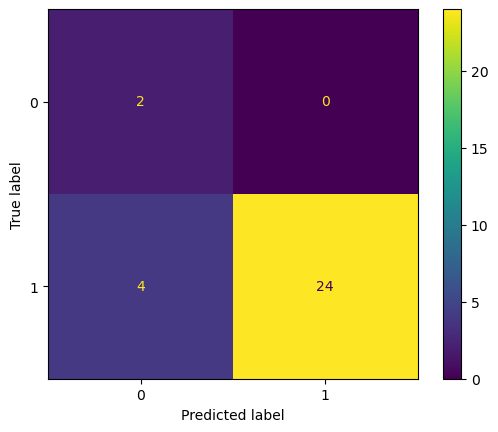

In [770]:
disp = ConfusionMatrixDisplay(conf_matrix1)
disp.plot()
plt.show()

In [771]:
auc = np.round(roc_auc_score(y_pred, y_test),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.929


## Implementation 2 - Using Gaussian Naive Bayes classifier

In [772]:
# Initialize the Gaussian Naive Bayes classifier
clf2 = GaussianNB()

In [773]:
# Train the model on the training data
model2 = clf2.fit(X_train, y_train)

In [774]:
# Make predictions on the test data
pred_test2 = model2.predict(X_test)

In [775]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test2, y_test)*100)

70.0

In [776]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test2, y_test, average='weighted')*100)

73.88888888888889

In [777]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test2, y_test, average='weighted')*100)

70.0

In [778]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test2, y_test, average='weighted')* 100,2))

67.03

In [779]:
report2 = classification_report(y_test, pred_test2)
print(f"Classification Report: \n{report2}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.38      0.83      0.53         6
           1       0.94      0.67      0.78        24

    accuracy                           0.70        30
   macro avg       0.66      0.75      0.65        30
weighted avg       0.83      0.70      0.73        30



array([[ 5,  8],
       [ 1, 16]])

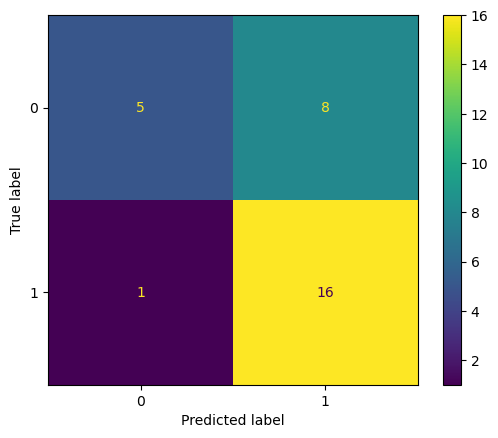

In [780]:
# Display the confusion matrix
conf_matrix2 = confusion_matrix(pred_test2, y_test)
display(conf_matrix2)

disp = ConfusionMatrixDisplay(conf_matrix2)
disp.plot()
plt.show()

In [781]:
auc = np.round(roc_auc_score(pred_test2, y_test),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.663


## Implementation 3 - using Multinomial Naive Bayes Classifier

In [782]:
clf3 = MultinomialNB()

In [783]:
# Train the model on the training data
model3 = clf3.fit(X_train, y_train)

In [784]:
# Make predictions on the test data
pred_test3 = model3.predict(X_test)

In [785]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test3, y_test)*100)

36.666666666666664

In [786]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test3, y_test, average='weighted')*100)

69.72222222222223

In [787]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test3, y_test, average='weighted')*100)

36.666666666666664

In [788]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test3, y_test, average='weighted')* 100,2))

35.47

In [789]:
report3 = classification_report(y_test, pred_test3)
print(f"Classification Report: \n{report3}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.22      0.83      0.34         6
           1       0.86      0.25      0.39        24

    accuracy                           0.37        30
   macro avg       0.54      0.54      0.37        30
weighted avg       0.73      0.37      0.38        30



array([[ 5, 18],
       [ 1,  6]])

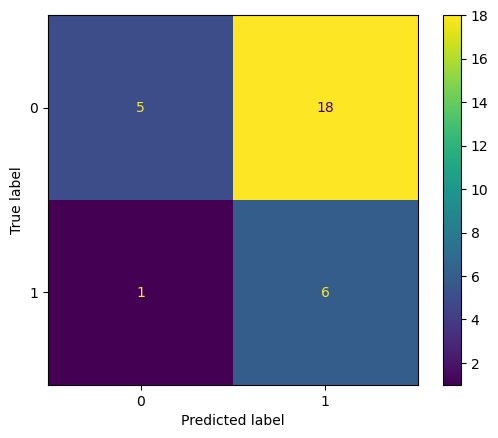

In [790]:
# Display the confusion matrix
conf_matrix3 = confusion_matrix(pred_test3, y_test)
display(conf_matrix3)

disp = ConfusionMatrixDisplay(conf_matrix3)
disp.plot()
plt.show()

In [791]:
auc = np.round(roc_auc_score(pred_test3, y_test),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.537


## Implementation 4 - Using Random Forest Classifier

In [792]:
# Model Building
clf4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [793]:
# Train the model on the training data
model4 = clf4.fit(X_train, y_train)

In [794]:
# Make predictions on the test data
pred_test4 = model4.predict(X_test)

In [795]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test4, y_test)*100)

93.33333333333333

In [796]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test4, y_test, average='weighted')*100)

95.55555555555556

In [797]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test4, y_test, average='weighted')*100)

93.33333333333333

In [798]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test4, y_test, average='weighted')* 100,2))

93.87

In [799]:
report4 = classification_report(y_test, pred_test4)
print(f"Classification Report: \n{report4}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.92      1.00      0.96        24

    accuracy                           0.93        30
   macro avg       0.96      0.83      0.88        30
weighted avg       0.94      0.93      0.93        30



array([[ 4,  0],
       [ 2, 24]])

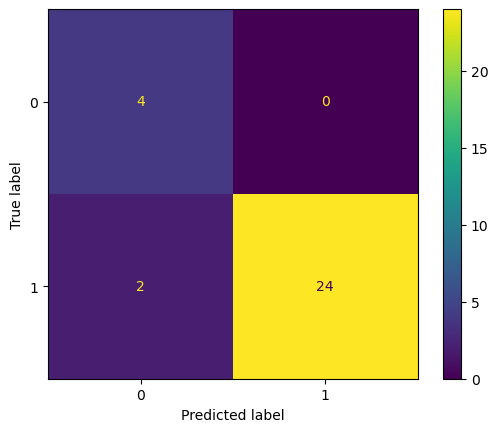

In [800]:
# Display the confusion matrix
conf_matrix4 = confusion_matrix(pred_test4, y_test)
display(conf_matrix4)

disp = ConfusionMatrixDisplay(conf_matrix4)
disp.plot()
plt.show()

In [801]:
auc = np.round(roc_auc_score(pred_test4, y_test),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.962


In [802]:
model6=RandomForestClassifier(n_estimators=1000,min_samples_split = 5,min_samples_leaf = 1)

In [803]:
model6.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=1000)

In [804]:
# Make predictions on the test data
pred_test6 = model6.predict(X_test)

In [805]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test6, y_test)*100)

96.66666666666667

In [806]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test6, y_test, average='weighted')*100)

97.22222222222221

In [807]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test6, y_test, average='weighted')*100)

96.66666666666667

In [808]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test6, y_test, average='weighted')* 100,2))

96.78

In [809]:
report6 = classification_report(y_test, pred_test6)
print(f"Classification Report: \n{report6}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.96      1.00      0.98        24

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.97        30



array([[ 5,  0],
       [ 1, 24]])

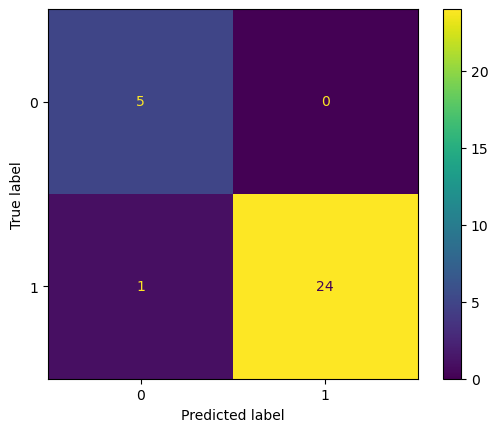

In [810]:
# Display the confusion matrix
conf_matrix6= confusion_matrix(pred_test6, y_test)
display(conf_matrix6)

disp = ConfusionMatrixDisplay(conf_matrix6)
disp.plot()
plt.show()

In [811]:
auc = np.round(roc_auc_score(pred_test6, y_test),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.98


## Implementation 6 - Using Multinomial Naive Bayes Grid Search

In [812]:
params = {'alpha': [0.01,0.1,0.5,1,10],}

model7 = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
model7.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]}, verbose=5)

In [813]:
# Make predictions on the test data
pred_test7 = model7.predict(X_test)

In [814]:
print('Train Accuracy : %.3f'%model7.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%model7.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%model7.best_score_)
print('Best Parameters : ',model7.best_params_)

Train Accuracy : 0.533
Test Accuracy : 0.367
Best Accuracy Through Grid Search : 0.525
Best Parameters :  {'alpha': 0.01}


In [815]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test7, y_test)*100)

36.666666666666664

In [816]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test7, y_test, average='weighted')*100)

69.72222222222223

In [817]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test7, y_test, average='weighted')*100)

36.666666666666664

In [818]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test7, y_test, average='weighted')* 100,2))

35.47

In [819]:
report7 = classification_report(y_test, pred_test7)
print(f"Classification Report: \n{report7}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.22      0.83      0.34         6
           1       0.86      0.25      0.39        24

    accuracy                           0.37        30
   macro avg       0.54      0.54      0.37        30
weighted avg       0.73      0.37      0.38        30



array([[ 5, 18],
       [ 1,  6]])

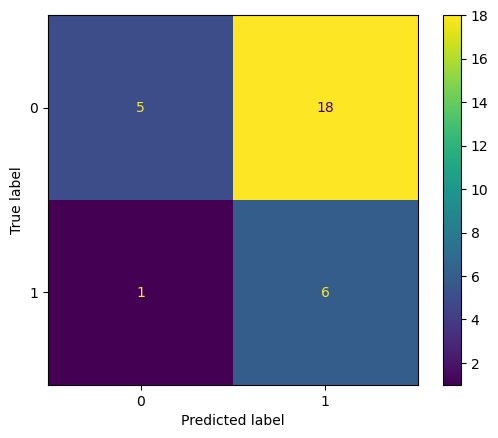

In [820]:
# Display the confusion matrix
conf_matrix7= confusion_matrix(pred_test7, y_test)
display(conf_matrix7)

disp = ConfusionMatrixDisplay(conf_matrix7)
disp.plot()
plt.show()

In [821]:
auc = np.round(roc_auc_score(pred_test7, y_test),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.537


## Implementation 7 - Using Gradient Boosting Classifier

In [822]:
model8 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [823]:
model8.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [824]:
# Make predictions on the test data
pred_test8 = model8.predict(X_test)

In [825]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test8, y_test)*100)

90.0

In [826]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test8, y_test, average='weighted')*100)

90.97222222222221

In [827]:
display(recall_score(pred_test8, y_test, average='weighted')*100)

90.0

In [828]:
display(round(metrics.f1_score(pred_test8, y_test, average='weighted')* 100,2))

90.35

In [829]:
report8 = classification_report(y_test, pred_test8)
print(f"Classification Report: \n{report8}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.92      0.96      0.94        24

    accuracy                           0.90        30
   macro avg       0.86      0.81      0.83        30
weighted avg       0.90      0.90      0.90        30



array([[ 4,  1],
       [ 2, 23]])

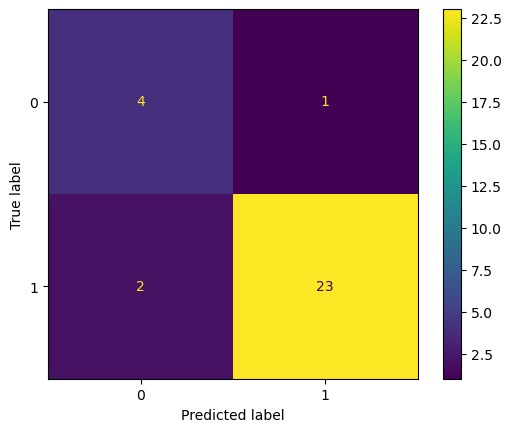

In [830]:
# Display the confusion matrix
conf_matrix8= confusion_matrix(pred_test8, y_test)
display(conf_matrix8)

disp = ConfusionMatrixDisplay(conf_matrix8)
disp.plot()
plt.show()

In [831]:
auc = np.round(roc_auc_score(pred_test8, y_test),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.86


In [832]:
from imblearn.over_sampling import SMOTE

In [833]:
!pip install -U threadpoolctl


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [834]:
smote = SMOTE(random_state = 42, k_neighbors=2)
smote

SMOTE(k_neighbors=2, random_state=42)

In [835]:
X_resampling,y_resampling = smote.fit_resample(X,y)

In [836]:
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_resampling, y_resampling, test_size = 0.3, random_state = 42)

In [837]:
# Initialize the Logistic Regression classifier
clf01 = LogisticRegression(max_iter=10000)

In [838]:
# Train the model on the training data
model01 = clf01.fit(X_train_up, y_train_up)

In [839]:
# Make predictions on the test data
pred_test01 = model01.predict(X_test_up)

In [840]:
print('Accuracy is:', accuracy_score(pred_test01, y_test_up)*100)
print('Precision is:', precision_score(pred_test01, y_test_up, average='weighted')*100)
print('Recall is:', recall_score(pred_test01, y_test_up, average='weighted')*100)
#print('f1-score is:', round(metrics.f1_score(pred_test01, y_test_up, average='weighted')* 100,2))

Accuracy is: 86.11111111111111
Precision is: 86.86221186221186
Recall is: 86.11111111111111


In [841]:
report01 = classification_report(y_test_up, pred_test01)
print(f"Classification Report: \n{report01}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        39
           1       0.90      0.79      0.84        33

    accuracy                           0.86        72
   macro avg       0.87      0.86      0.86        72
weighted avg       0.86      0.86      0.86        72



In [842]:
# Display the confusion matrix
conf_matrix01 = confusion_matrix(pred_test01, y_test_up)
display(conf_matrix01)

array([[36,  7],
       [ 3, 26]])

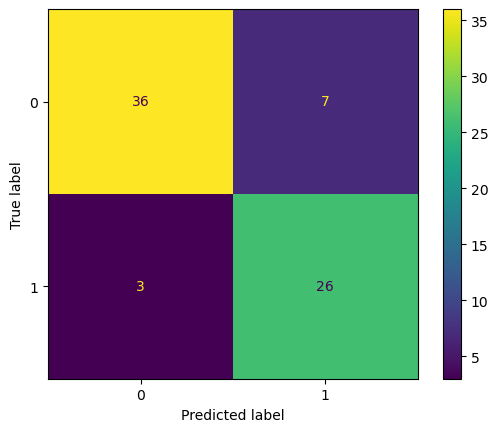

In [843]:
disp = ConfusionMatrixDisplay(conf_matrix01)
disp.plot()
plt.show()

In [844]:
auc = np.round(roc_auc_score(pred_test01, y_test_up),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.867


In [845]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#import lightgbm as lgbm
#import xgboost as xgboost
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [846]:
# Initialize the Gaussian Naive Bayes classifier
clf02 = GaussianNB()

In [847]:
# Train the model on the training data
model02 = clf02.fit(X_train_up, y_train_up)

In [848]:
# Make predictions on the test data
pred_test02 = model02.predict(X_test_up)

In [849]:
print('Accuracy is:', accuracy_score(pred_test02, y_test_up)*100)
print('Precision is:', precision_score(pred_test02, y_test_up, average='weighted')*100)
print('Recall is:', recall_score(pred_test02, y_test_up, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test02, y_test_up, average='weighted')* 100,2))

Accuracy is: 87.5
Precision is: 88.61693861693861
Recall is: 87.5
f1-score is: 87.64


In [850]:
report02 = classification_report(y_test_up, pred_test02)
print(f"Classification Report: \n{report02}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        39
           1       0.93      0.79      0.85        33

    accuracy                           0.88        72
   macro avg       0.88      0.87      0.87        72
weighted avg       0.88      0.88      0.87        72



array([[37,  7],
       [ 2, 26]])

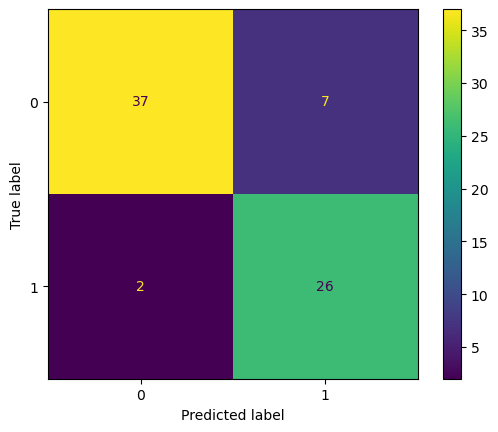

In [851]:
# Display the confusion matrix
conf_matrix2 = confusion_matrix(pred_test02, y_test_up)
display(conf_matrix2)

disp = ConfusionMatrixDisplay(conf_matrix2)
disp.plot()
plt.show()

In [852]:
auc = np.round(roc_auc_score(pred_test02, y_test_up),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.885


## Implementation 3 - using Multinomial Naive Bayes Classifier

In [853]:
clf03 = MultinomialNB()

In [854]:
# Train the model on the training data
model03 = clf03.fit(X_train_up, y_train_up)

In [855]:
# Make predictions on the test data
pred_test03 = model03.predict(X_test_up)

In [856]:
print('Accuracy is:', accuracy_score(pred_test03, y_test_up)*100)
print('Precision is:', precision_score(pred_test03, y_test_up, average='weighted')*100)
print('Recall is:', recall_score(pred_test03, y_test_up, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test03, y_test_up, average='weighted')* 100,2))

Accuracy is: 68.05555555555556
Precision is: 77.91375291375292
Recall is: 68.05555555555556
f1-score is: 70.18


In [857]:
report03 = classification_report(y_test_up, pred_test03)
print(f"Classification Report: \n{report03}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        39
           1       0.78      0.42      0.55        33

    accuracy                           0.68        72
   macro avg       0.71      0.66      0.65        72
weighted avg       0.71      0.68      0.66        72



array([[35, 19],
       [ 4, 14]])

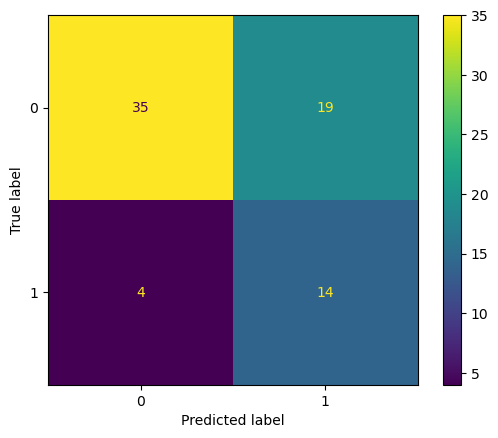

In [858]:
# Display the confusion matrix
conf_matrix03 = confusion_matrix(pred_test03, y_test_up)
display(conf_matrix03)

disp = ConfusionMatrixDisplay(conf_matrix03)
disp.plot()
plt.show()

In [859]:
auc = np.round(roc_auc_score(pred_test03, y_test_up),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.713


## Using Random Forrest Classifier

In [860]:
# Model Building
clf04 = RandomForestClassifier(n_estimators=100, random_state=42)

In [861]:
# Train the model on the training data
model04 = clf04.fit(X_train_up, y_train_up)

In [862]:
# Make predictions on the test data
pred_test04 = model04.predict(X_test_up)

In [863]:
print('Accuracy is:', accuracy_score(pred_test04, y_test_up)*100)
print('Precision is:', precision_score(pred_test04, y_test_up, average='weighted')*100)
print('Recall is:', recall_score(pred_test04, y_test_up, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test04, y_test_up, average='weighted')* 100,2))

Accuracy is: 97.22222222222221
Precision is: 97.36467236467237
Recall is: 97.22222222222221
f1-score is: 97.22


In [864]:
report04 = classification_report(y_test_up, pred_test04)
print(f"Classification Report: \n{report04}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.94      1.00      0.97        33

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



array([[37,  0],
       [ 2, 33]])

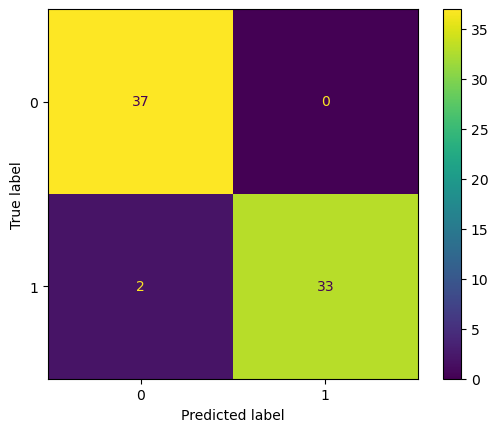

In [865]:
# Display the confusion matrix
conf_matrix04 = confusion_matrix(pred_test04, y_test_up)
display(conf_matrix04)

disp = ConfusionMatrixDisplay(conf_matrix04)
disp.plot()
plt.show()

In [866]:
auc = np.round(roc_auc_score(pred_test04, y_test_up),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.971


In [867]:
clf05=RandomForestClassifier(n_estimators=1000,min_samples_split = 5,min_samples_leaf = 1)

In [868]:
# Train the model on the training data
model05 = clf05.fit(X_train_up, y_train_up)

In [869]:
# Make predictions on the test data
pred_test05 = model05.predict(X_test_up)

In [870]:
print('Accuracy is:', accuracy_score(pred_test05, y_test_up)*100)
print('Precision is:', precision_score(pred_test05, y_test_up, average='weighted')*100)
print('Recall is:', recall_score(pred_test05, y_test_up, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test05, y_test_up, average='weighted')* 100,2))

Accuracy is: 95.83333333333334
Precision is: 95.86247086247084
Recall is: 95.83333333333334
f1-score is: 95.83


In [871]:
report05 = classification_report(y_test_up, pred_test05)
print(f"Classification Report: \n{report05}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.94      0.97      0.96        33

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



array([[37,  1],
       [ 2, 32]])

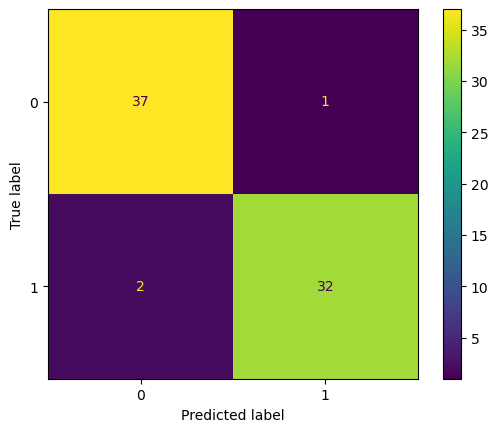

In [872]:
# Display the confusion matrix
conf_matrix05 = confusion_matrix(pred_test05, y_test_up)
display(conf_matrix05)

disp = ConfusionMatrixDisplay(conf_matrix05)
disp.plot()
plt.show()

In [873]:
auc = np.round(roc_auc_score(pred_test05, y_test_up),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.957


## Using GridSearch CV

In [874]:
params = {'alpha': [0.01,0.1,0.5,1,10],}

model07 = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
model07.fit(X_train_up,y_train_up)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]}, verbose=5)

In [875]:
# Make predictions on the test data
pred_test07 = model07.predict(X_test_up)

In [876]:
print('Accuracy is:', accuracy_score(pred_test07, y_test_up)*100)
print('Precision is:', precision_score(pred_test07, y_test_up, average='weighted')*100)
print('Recall is:', recall_score(pred_test07, y_test_up, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test07, y_test_up, average='weighted')* 100,2))

Accuracy is: 68.05555555555556
Precision is: 77.91375291375292
Recall is: 68.05555555555556
f1-score is: 70.18


In [877]:
report07 = classification_report(y_test_up, pred_test07)
print(f"Classification Report: \n{report07}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        39
           1       0.78      0.42      0.55        33

    accuracy                           0.68        72
   macro avg       0.71      0.66      0.65        72
weighted avg       0.71      0.68      0.66        72



In [878]:
print('Train Accuracy : %.3f'%model07.best_estimator_.score(X_train_up, y_train_up))
print('Test Accuracy : %.3f'%model07.best_estimator_.score(X_test_up, y_test_up))
print('Best Accuracy Through Grid Search : %.3f'%model07.best_score_)
print('Best Parameters : ',model07.best_params_)

Train Accuracy : 0.643
Test Accuracy : 0.681
Best Accuracy Through Grid Search : 0.631
Best Parameters :  {'alpha': 0.01}


array([[35, 19],
       [ 4, 14]])

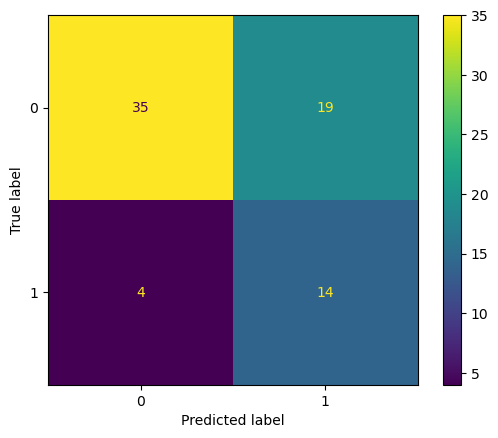

In [879]:
# Display the confusion matrix
conf_matrix07 = confusion_matrix(pred_test07, y_test_up)
display(conf_matrix07)

disp = ConfusionMatrixDisplay(conf_matrix07)
disp.plot()
plt.show()

In [880]:
auc = np.round(roc_auc_score(pred_test07, y_test_up),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.713


## Using Gradient Boost Classifier

In [881]:
clf08 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [882]:
# Train the model on the training data
model08 = clf08.fit(X_train_up, y_train_up)

In [883]:
# Make predictions on the test data
pred_test08 = model08.predict(X_test_up)

In [884]:
print('Accuracy is:', accuracy_score(pred_test08, y_test_up)*100)
print('Precision is:', precision_score(pred_test08, y_test_up, average='weighted')*100)
print('Recall is:', recall_score(pred_test08, y_test_up, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test08, y_test_up, average='weighted')* 100,2))

Accuracy is: 94.44444444444444
Precision is: 94.62574462574463
Recall is: 94.44444444444444
f1-score is: 94.46


In [885]:
report08 = classification_report(y_test_up, pred_test08)
print(f"Classification Report: \n{report08}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.97      0.91      0.94        33

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



In [886]:
# Display the confusion matrix
conf_matrix08 = confusion_matrix(pred_test08, y_test_up)
display(conf_matrix08)

disp = ConfusionMatrixDisplay(conf_matrix08)
disp.plot()
plt.show()

array([[38,  3],
       [ 1, 30]])

In [887]:
auc = np.round(roc_auc_score(pred_test08, y_test_up),3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.947
